# Data Analysis

In this file, we will provide the data analysis part. For each feature, we will provide some analysis and visualization to help us understand the data better. The analysis will be based on the type of the feature. For example, for numerical features, we will provide the plot of distribution, and so on. For text features, we will provide the frequency of each category. 

Because we have climbed some of the data and features online and did some data cleaning, we will not provide the data cleaning part here. We will only provide the data after cleaning and some analysis based on the cleaned data.

First, we will import the necessary libraries and load the data.

In [184]:
#Imports all the libraries needed for the project
import ast
import pandas as pd
import numpy as np
from numpy import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
import wordcloud
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [185]:
#Reads in the data
train = pd.read_csv('data/final_train.csv')
test = pd.read_csv('data/test.csv')

## Statistics of the data

### 1. Overall

First, we will provide a overall statistics of the data. We will  provide the shape of the training data and testing data, and what haven been covered in the data. 

In [186]:
#shape of the data
print("Shape of train: " + str(train.shape))
print("Shape of test: " + str(test.shape))

Shape of train: (7292, 30)
Shape of test: (4398, 22)


In [187]:
#head of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7292 non-null   int64  
 1   belongs_to_collection  4898 non-null   object 
 2   budget                 7292 non-null   int64  
 3   genres                 7285 non-null   object 
 4   homepage               2974 non-null   object 
 5   imdb_id                7292 non-null   object 
 6   original_language      7292 non-null   object 
 7   original_title         7292 non-null   object 
 8   overview               7286 non-null   object 
 9   popularity             7292 non-null   float64
 10  poster_path            7292 non-null   object 
 11  production_companies   7137 non-null   object 
 12  production_countries   7238 non-null   object 
 13  release_date           7292 non-null   object 
 14  runtime                7292 non-null   float64
 15  spok

There are unfilled data in the training data and testing data. We will provide the distribution of the unfilled data in the training data and testing data.

<Axes: >

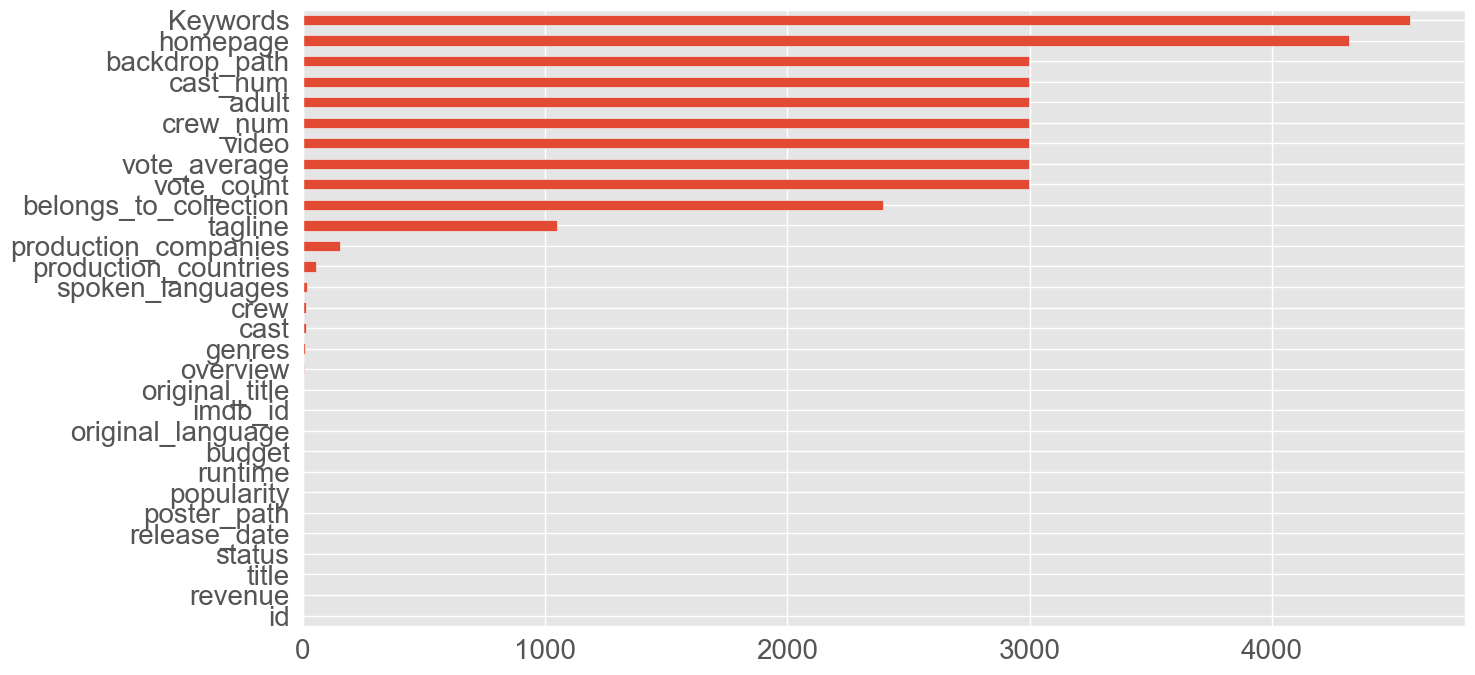

In [188]:
#Quick peak into NA columns of training data
fig = plt.figure(figsize=(15, 8))
train.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20)

<Axes: >

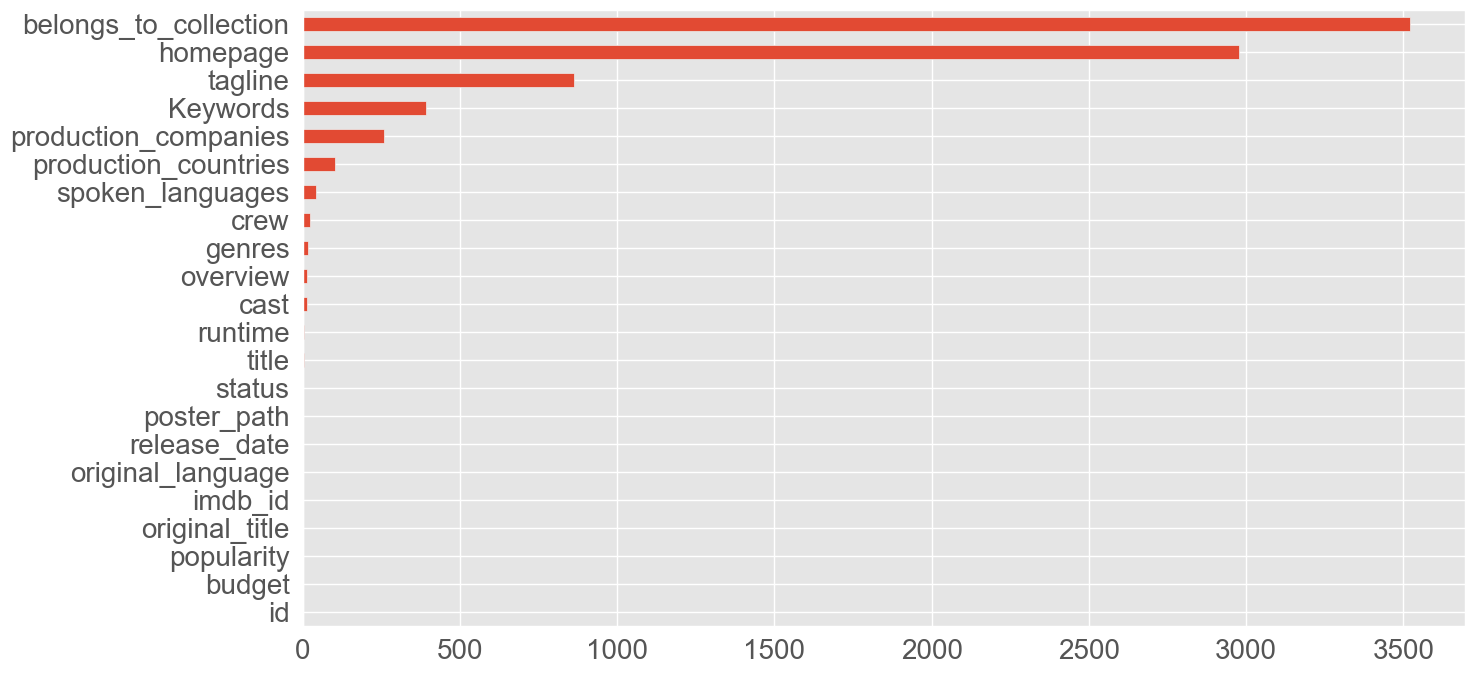

In [189]:
#Quick peak into NA columns of test data
fig = plt.figure(figsize=(15, 8))
test.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20)

### 2. Revenue

Revenue is the target of our prediction.

We want to know how many missing or 0 values are there in the revenue column in the training data.

In [190]:
print("Number of NA Train for the variable revenue: " + str(train[train.revenue.isna()].shape[0]))
print('Movies with revenue listed as 0: ',(train.revenue == 0).sum())

Number of NA Train for the variable revenue: 0
Movies with revenue listed as 0:  0


We will use the function `describe()` to provide the distribution by printing the Boxplot, Histogram, and log Histogram.

In [191]:
# function to plot the distribution of a feature
def plot_dist(field, color):
    f, ax = plt.subplots(3, figsize=(10,6))

    sns.set(rc={'figure.figsize':(12,8)})
    sns.boxplot(x=train[field], ax = ax[0], color=color)
    ax[0].set_title(f"Box Plot of {field} variable")
    sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
    ax[1].set_title(f"Histogram of {field} variable")
    sns.distplot(a=np.log1p(train[field]), kde = False, ax = ax[2], color=color, hist_kws=dict(alpha=1))
    ax[2].set_title(f"Log1p transformed {field} Histogram")
    f.tight_layout()

C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

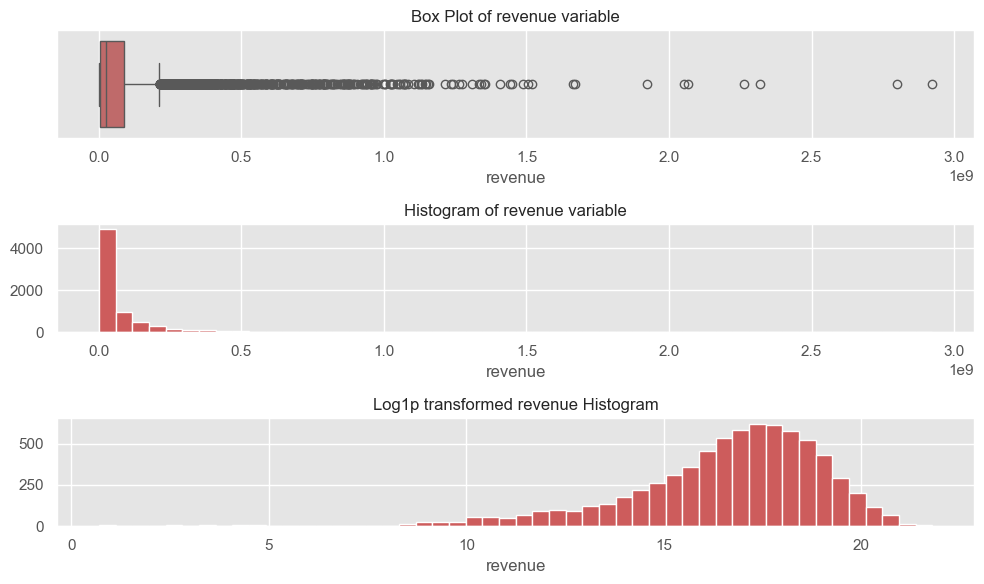

In [192]:
plot_dist('revenue', 'indianred')

We list the top 20 smallest revenue and top 20 largest revenue in the training data to check if there are any outliers or errors.

In [193]:
train.revenue.nsmallest(20)

347      1
1753     1
1873     1
1916     1
5831     1
695      2
334      3
1540     3
2381     3
2116     4
1345     5
2488     6
1190     7
639      8
2250     8
2580     8
280     10
665     10
3293    10
1141    11
Name: revenue, dtype: int64

### 3. belongs_to_collection

belongs_to_collection is a feature that indicates whether the movie belongs to a collection.

The number of missing values in this feature.

In [194]:
print("Number of NA Train for the variable belongs_to_collection: " + str(train[train.belongs_to_collection.isna()].shape[0]))
print("Number of NA Test for the variable belongs_to_collection: " + str(test[test.belongs_to_collection.isna()].shape[0]))

Number of NA Train for the variable belongs_to_collection: 2394
Number of NA Test for the variable belongs_to_collection: 3521


### 4. Budget

budget is a feature that indicates the budget of the movie. It is a numerical feature and have a high correlation with the revenue.

We want to know how many missing or 0 values are there in the revenue column in the training data and testing data.

In [195]:
print("Number of NA Train for the variable budget: " + str(train[train.budget.isna()].shape[0]))
print("Number of NA Test for the variable budget: " + str(test[test.budget.isna()].shape[0]))
print('Movies with budget listed as 0 in training set: ',(train.budget == 0).sum())
print('Movies with budget listed as 0 in test set: ',(test.budget == 0).sum())

Number of NA Train for the variable budget: 0
Number of NA Test for the variable budget: 0
Movies with budget listed as 0 in training set:  1657
Movies with budget listed as 0 in test set:  1211


C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

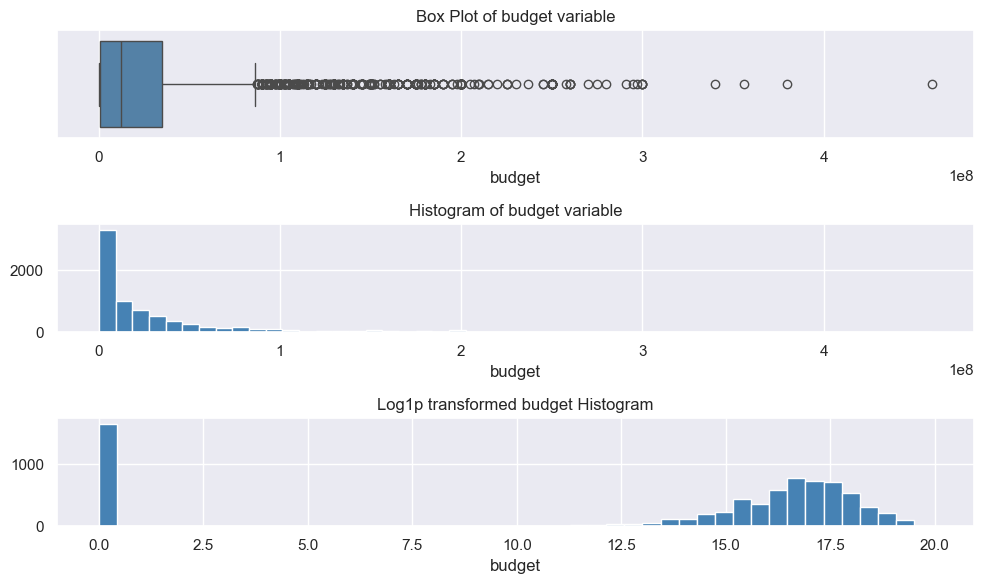

In [196]:
# plot the distribution of budget
plot_dist('budget', 'steelblue')

### 5. genres

genres is a feature that indicates the genres of the movie. It is a text feature and it will classify the movie into different categories.

we want to know how many missing values are there in the genres column in the training data and testing data.

In [197]:
print("Number of NA Train for the variable genres: " + str(train[train.genres.isna()].shape[0]))
print("Number of NA Test for the variable genres: " + str(test[test.genres.isna()].shape[0]))

Number of NA Train for the variable genres: 7
Number of NA Test for the variable genres: 16


The frequency of each category in the genres column in the training data.

In [198]:
# count the word frequency in the genres column in the training set
train["genres"] = train["genres"].fillna("[]")
genres = train.genres.apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
genres = genres.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genres = genres.apply(lambda x: ' '.join(x))
freq_genres = genres.value_counts()
print(freq_genres.head(20))

genres
Drama                               477
Comedy                              332
Drama Romance                       217
Comedy Romance                      181
Comedy Drama                        148
Horror Thriller                     142
Comedy Drama Romance                117
Horror                               93
Action Thriller                      85
Drama Thriller                       85
Drama History                        79
Action Crime Thriller                68
Crime Drama Thriller                 64
Drama Comedy                         61
Romance Drama                        56
Crime Drama                          56
Action Comedy                        51
Action Adventure Science Fiction     50
Horror Mystery Thriller              50
Comedy Crime                         50
Name: count, dtype: int64


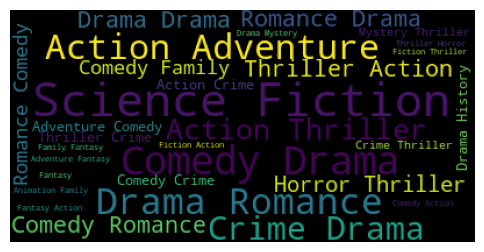

In [199]:
#wordcloud for genres in the training set
stopWords = set(wordcloud.STOPWORDS)
stopWords.add('movie')
stopWords.add('&')
wc_genres_train=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_genres_train.generate(' '.join(genres))
plt.figure(figsize=(6,6))
plt.imshow(wc_genres_train)
plt.axis('off')
plt.show()

The frequency of each category in the genres column in the testing data.

In [200]:
# count the word frequency in the genres column in the test set
test["genres"] = test["genres"].fillna("[]")
genres = test.genres.apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
genres = genres.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genres = genres.apply(lambda x: ' '.join(x))
freq_genres = genres.value_counts()
print(freq_genres.head(20))

genres
Drama                          348
Comedy                         291
Drama Romance                  179
Comedy Drama                   134
Comedy Romance                 124
Comedy Drama Romance           107
Documentary                     86
Horror Thriller                 75
Drama Thriller                  59
Drama Comedy                    53
Horror                          53
Action Thriller                 43
Drama History                   34
Crime Drama                     34
Comedy Family                   31
Crime Drama Thriller            31
Action Comedy                   30
Drama Comedy Romance            29
Comedy Crime                    25
Action Crime Drama Thriller     25
Name: count, dtype: int64


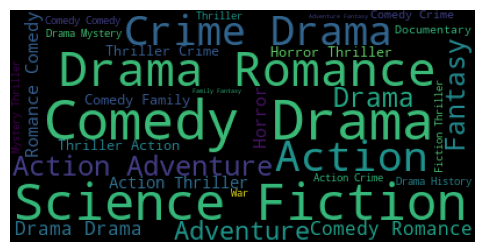

In [201]:
# wordcloud for genres in the test set
wc_genres_test=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_genres_test.generate(' '.join(genres))
plt.figure(figsize=(6,6))
plt.imshow(wc_genres_test)
plt.axis('off')
plt.show()

### 6. homepage

homepage is a feature that indicates the homepage of the movie. It is a text feature but the content is a URL and the ceratin content of the URL are not useful for us.

We want to know how many missing values are there in the homepage column in the training data and testing data. We can take whether the movie has a homepage as a feature in the following feature engineering part.

In [202]:
print("Number of NA Train for the variable homepage: " + str(train[train.homepage.isna()].shape[0]))
print("Number of NA Test for the variable homepage: " + str(test[test.homepage.isna()].shape[0]))

Number of NA Train for the variable homepage: 4318
Number of NA Test for the variable homepage: 2978


### 7. imdb_id

This is the id of the movie in the IMDB website. We will not use this feature in the following feature engineering part and only take it as a unique id of the movie.

We want to know how many missing values are there in the imdb_id column in the training data and testing data. 

In [203]:
print("Number of NA Train for the variable imdb_id: " + str(train[train.imdb_id.isna()].shape[0]))
print("Number of NA Test for the variable imdb_id: " + str(test[test.imdb_id.isna()].shape[0]))

Number of NA Train for the variable imdb_id: 0
Number of NA Test for the variable imdb_id: 0


### 8. original_language

original_language is a feature that indicates the original language of the movie. It is a text feature and it will classify the movie into different categories according to the language. The categories might be useful because different language will lead to different initial audience, and the movie might be more popular in the country that the language is used.

We want to know how many missing values are there in the original_language column in the training data and testing data.

In [204]:
print("Number of NA Train for the variable original_language: " + str(train[train.original_language.isna()].shape[0]))
print("Number of NA Test for the variable original_language: " + str(test[test.original_language.isna()].shape[0]))

Number of NA Train for the variable original_language: 0
Number of NA Test for the variable original_language: 0


The frequency of each category in the original_language column in the training data.

,number_of_movies
en,6158
ja,232
fr,179
es,103
ko,96
zh,80
ru,79
hi,67
cn,55
it,55


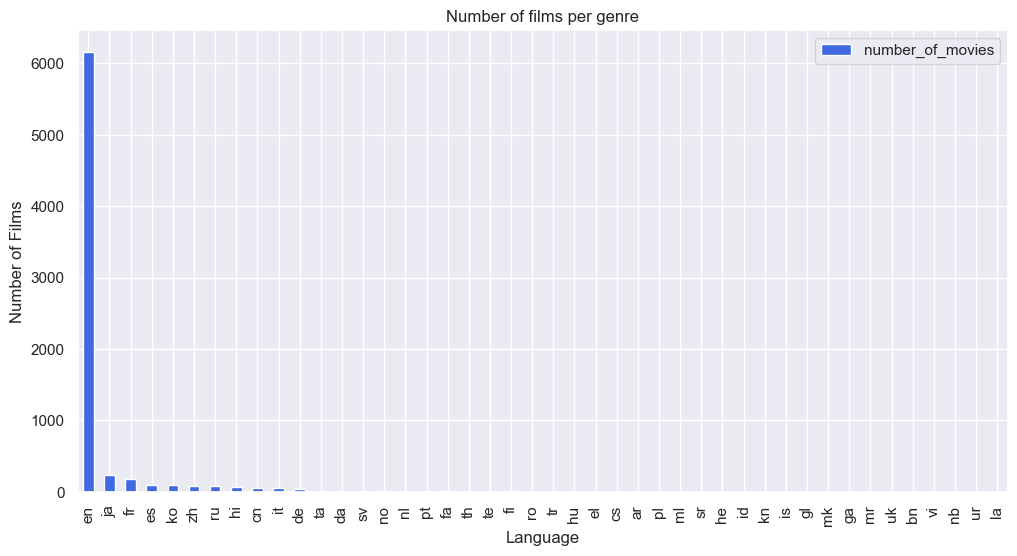

In [205]:
lanDict = dict()

for lan in train["original_language"]:
    if lan not in lanDict:
        lanDict[lan] = 1
    else:
        lanDict[lan] += 1
        
sns.set(rc={'figure.figsize':(12,6)})
lan_df = pd.DataFrame.from_dict(lanDict, orient='index')
lan_df.columns = ["number_of_movies"]
lan_df = lan_df.sort_values(by="number_of_movies", ascending=False)
lan_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Language")
lan_df.head(10)

The frequency of each category in the original_language column in the testing data.

,number_of_movies
en,3776
fr,121
hi,76
ru,62
ja,53
es,52
it,32
de,31
ko,29
zh,27


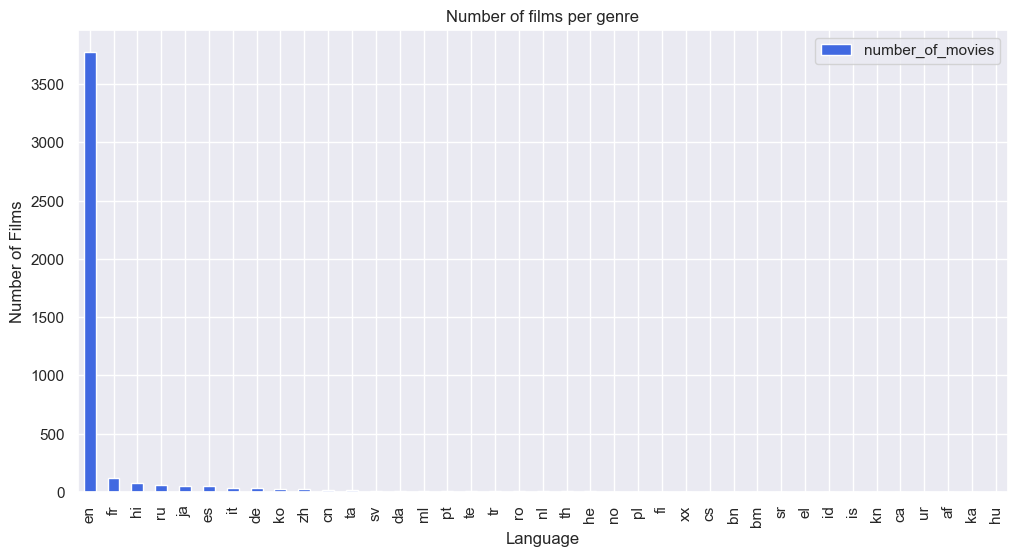

In [206]:
lanDictTest = dict()
for lan in test["original_language"]:
    if lan not in lanDictTest:
        lanDictTest[lan] = 1
    else:
        lanDictTest[lan] += 1
sns.set(rc={'figure.figsize':(12,6)})
lan_df_test = pd.DataFrame.from_dict(lanDictTest, orient='index')
lan_df_test.columns = ["number_of_movies"]
lan_df_test = lan_df_test.sort_values(by="number_of_movies", ascending=False)
lan_df_test.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Language")
lan_df_test.head(10)

The following plots will show the correlation between the original_language and the revenue.

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

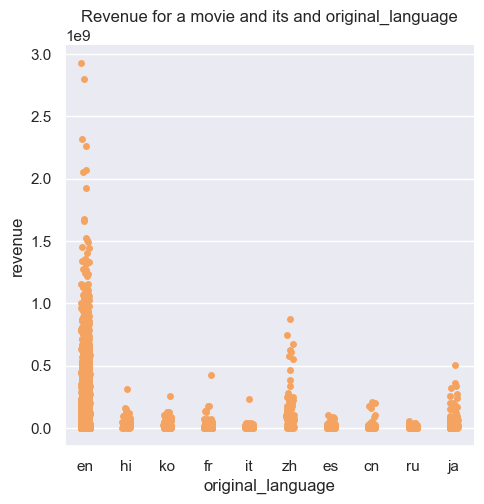

In [207]:
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

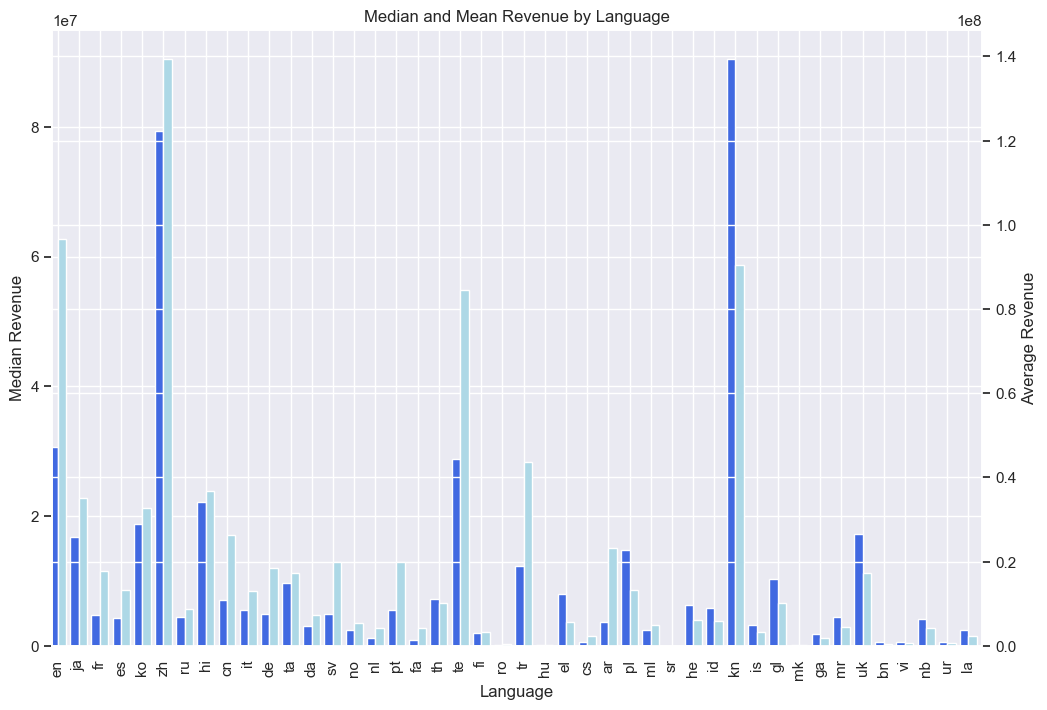

In [208]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
for g in lan_df.index.values:
    train[g] = train['original_language'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "median_rev"] = train[train[g]==1].revenue.median()
    
lan_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "mean_rev"] = train[train[g]==1].revenue.mean()

lan_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

# plot the mean and median revenue for each genre
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

lan_df.median_rev.plot(kind='bar', color='royalblue', ax=ax, width=width, position=1)
lan_df.mean_rev.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)
ax.set_ylabel('Median Revenue')
ax2.set_ylabel('Average Revenue')
ax.set_xlabel('Language')
plt.title('Median and Mean Revenue by Language')
plt.show()

### 9.original_title

original_title is a feature that indicates the name of the moive. These feature can be in language other than English. We will not use this feature in the following feature engineering part.

We want to know how many missing values are there in the original_title column in the training data and testing data.

In [209]:
print("Number of NA Train for the variable original_title: " + str(train[train.original_title.isna()].shape[0]))
print("Number of NA Test for the variable original_title: " + str(test[test.original_title.isna()].shape[0]))

Number of NA Train for the variable original_title: 0
Number of NA Test for the variable original_title: 0


We will get the frequency of the words in the original_title column in the training data and testing data to find if there are any words that are more frequent than others and might be useful for us.

In [210]:
# count the word frequency in the original_title column in the training set
title = "".join(train["original_title"])
title = title.lower()
title = [word for word in title.split() if word not in stopWords]
freq_title = pd.Series(title).value_counts()
print(freq_title.head(10))

last      48
de        47
part      37
2:        37
-         33
man       29
la        27
new       22
2the      20
secret    19
Name: count, dtype: int64


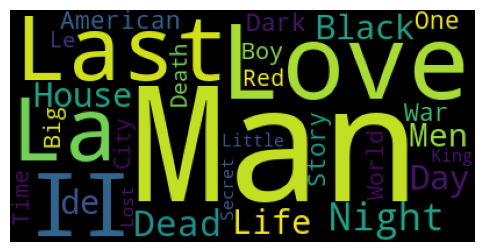

In [211]:
# wordcloud for original_title in the training set
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(train.original_title))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

In [212]:
# count the word frequency in the original_title column in the test set
title = "".join(test["original_title"])
title = title.lower()
title = [word for word in title.split() if word not in stopWords]
freq_title = pd.Series(title).value_counts()
print(freq_title.head(10))

de       32
man      21
2:       20
part     18
last     16
big      16
la       15
ii:      14
night    13
-        12
Name: count, dtype: int64


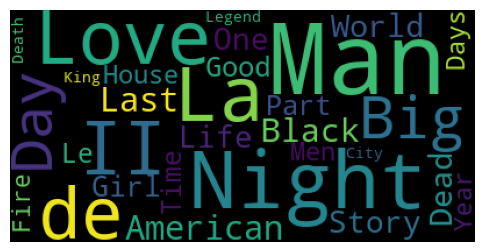

In [213]:
# wordcloud for original_title in the test set
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(test.original_title))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

### 10. overview

overview is a feature that give a brief introduction of the movie. It is a text feature. We will take advantage of this feature in the following feature engineering part by using NLP and word embedding.

We want to know how many missing values are there in the overview column in the training data and testing data.

In [214]:
print("Number of NA Train for the variable overview: " + str(train[train.overview.isna()].shape[0]))
print("Number of NA Test for the variable overview: " + str(test[test.overview.isna()].shape[0]))

Number of NA Train for the variable overview: 6
Number of NA Test for the variable overview: 14


We will use the overview column to create a word cloud to see the most frequent words in the overview column.

In [215]:
# count the word frequency in the overview column in the training set
train["overview"] = train["overview"].fillna("[]")
overview = "".join(train["overview"])
overview = overview.lower()
overview = [word for word in overview.split() if word not in stopWords]
freq_overview = pd.Series(overview).value_counts()
print(freq_overview.head(10))

new      1002
young     883
one       877
life      817
must      714
find      661
world     629
will      629
two       588
man       540
Name: count, dtype: int64


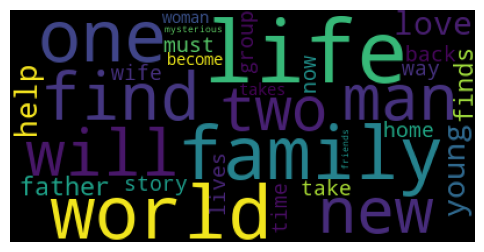

In [216]:
#wordcloud for overview in the training set
train['overview'] = train['overview'].fillna('')
wc_overview=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_overview.generate(' '.join(train['overview']))
plt.figure(figsize=(6,6))
plt.imshow(wc_overview)
plt.axis('off')
plt.show()

In [217]:
# count the word frequency in the overview column in the test set
test["overview"] = test["overview"].fillna("[]")
overview = "".join(test["overview"])
overview = overview.lower()
overview = [word for word in overview.split() if word not in stopWords]
freq_overview = pd.Series(overview).value_counts()
print(freq_overview.head(10))

new      631
one      594
young    513
life     508
two      406
man      397
find     376
will     371
world    360
must     353
Name: count, dtype: int64


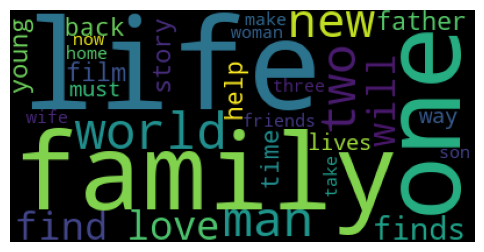

In [218]:
# wordcloud for overview in the test set
test['overview'] = test['overview'].fillna('')
wc_overview=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=stopWords,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_overview.generate(' '.join(test['overview']))
plt.figure(figsize=(6,6))
plt.imshow(wc_overview)
plt.axis('off')
plt.show()

### 11. popularity

popularity is a feature that indicates the popularity of the movie. It is a numerical feature and have a high correlation with the revenue.

We want to know how many missing values are there in the popularity column in the training data and testing data.

In [219]:
print("Number of NA Train for the variable popularity: " + str(train[train.popularity.isna()].shape[0]))
print("Number of NA Test for the variable popularity: " + str(test[test.popularity.isna()].shape[0]))

Number of NA Train for the variable popularity: 0
Number of NA Test for the variable popularity: 0


We plot tge bivariate distribution of the popularity and the revenue to see the correlation between them.

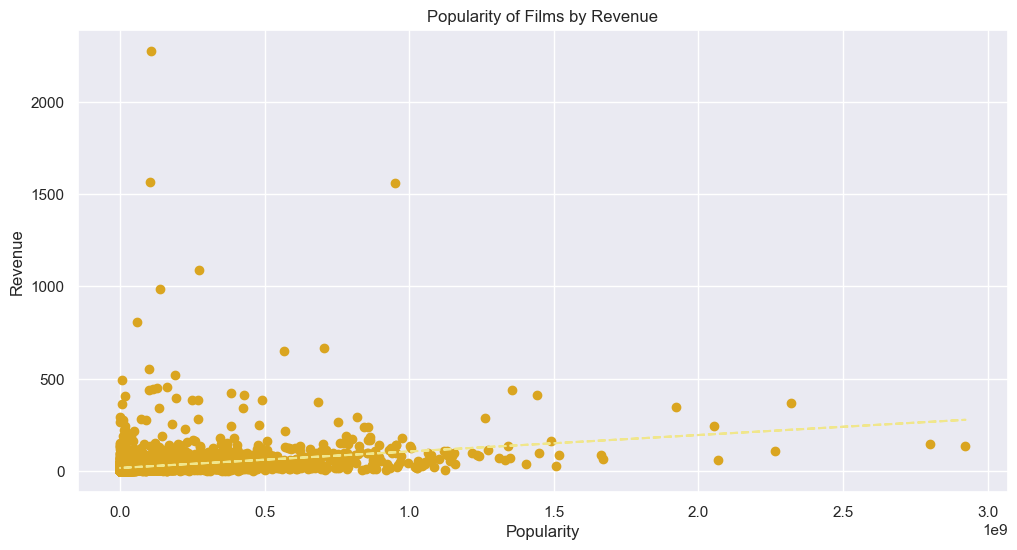

In [220]:
# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = train['revenue']
pop = train['popularity']
plt.plot(cx, pop, 'o', color='goldenrod')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='khaki');

### 12. poster_path

poster_path is a feature that indicates the path of the poster of the movie. 

We want to know how many missing values are there in the poster_path column in the training data and testing data. Whether the movie has a poster might be a feature in the following feature engineering part.

In [221]:
print("Number of NA Train for the variable poster_path: " + str(train[train.poster_path.isna()].shape[0]))
print("Number of NA Test for the variable poster_path: " + str(test[test.poster_path.isna()].shape[0]))

Number of NA Train for the variable poster_path: 0
Number of NA Test for the variable poster_path: 1


### 13. production_companies

production_companies is a feature that indicates the production companies of the movie. It is a text feature. We can find some famous production companies and use them as a feature in the following feature engineering part.

We want to know how many missing values are there in the production_companies column in the training data and testing data.

In [222]:
print("Number of NA Train for the variable production_companies: " + str(train[train.production_companies.isna()].shape[0]))
print("Number of NA Test for the variable production_companies: " + str(test[test.production_companies.isna()].shape[0]))

Number of NA Train for the variable production_companies: 155
Number of NA Test for the variable production_companies: 258


We will get the frequency of the words in the production_companies column in the training data and testing data to find if there are any words that are more frequent than others and might be useful for us.

In [223]:
# count the frequency in the production_companies column in the training set
train['production_companies'] = train['production_companies'].fillna('')
prod_comp = train['production_companies'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
prod_comp = prod_comp.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_prod_comp = prod_comp.value_counts()
print(freq_prod_comp.head(10))

production_companies
Universal Pictures           61
Paramount Pictures           51
Columbia Pictures            44
Paramount                    40
Metro-Goldwyn-Mayer (MGM)    33
Warner Bros.                 32
New Line Cinema              31
Walt Disney Productions      31
20th Century Fox             27
TriStar Pictures             26
Name: count, dtype: int64


In [224]:
# count the frequency in the production_companies column in the test set
test['production_companies'] = test['production_companies'].fillna('')
prod_comp = test['production_companies'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
prod_comp = prod_comp.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_prod_comp = prod_comp.value_counts()
print(freq_prod_comp.head(10))

production_companies
Paramount Pictures                        72
Universal Pictures                        52
Metro-Goldwyn-Mayer (MGM)                 48
Warner Bros.                              47
Twentieth Century Fox Film Corporation    36
Columbia Pictures                         36
New Line Cinema                           31
Touchstone Pictures                       21
Walt Disney Pictures                      20
Orion Pictures                            17
Name: count, dtype: int64


### 14. production_countries

production_countries is a feature that indicates the production countries of the movie. It is a text feature. We can find some countries that produce more movies and use them as a feature in the following feature engineering part.

We want to know how many missing values are there in the production_countries column in the training data and testing data.

In [225]:
print("Number of NA Train for the variable production_countries: " + str(train[train.production_countries.isna()].shape[0]))
print("Number of NA Test for the variable production_countries: " + str(test[test.production_countries.isna()].shape[0]))

Number of NA Train for the variable production_countries: 54
Number of NA Test for the variable production_countries: 102


We will get the frequency of the words in the production_countries column in the training data and testing data to find if there are any words that are more frequent than others and might be useful for us.

In [226]:
# count the frequency in the production_countries column in the training set
train['production_countries'] = train['production_countries'].fillna('')
prod_coun = train['production_countries'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
prod_coun = prod_coun.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_prod_coun = prod_coun.value_counts()
print(freq_prod_coun.head(10))

production_countries
United States of America                   3984
United Kingdom United States of America     339
Japan                                       219
United Kingdom                              171
Canada United States of America             152
Germany United States of America            112
India                                        99
France                                       97
South Korea                                  86
Russia                                       70
Name: count, dtype: int64


In [227]:
# count the frequency in the production_countries column in the test set
test['production_countries'] = test['production_countries'].fillna('')
prod_coun = test['production_countries'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
prod_coun = prod_coun.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_prod_coun = prod_coun.value_counts()
print(freq_prod_coun.head(10))

production_countries
United States of America                   2587
United Kingdom United States of America     150
India                                       114
United Kingdom                              111
Germany United States of America             73
France                                       66
Canada United States of America              61
Russia                                       60
Japan                                        46
Canada                                       37
Name: count, dtype: int64


### 15. release_date

release_date is a feature that indicates that the date of the movie released. It is a text feature. We can use this feature to get the year, month, and day of the movie released. It can be used as a feature corporating with other features.

We want to know how many missing values are there in the release_date column in the training data and testing data.

In [228]:
print("Number of NA Train for the variable release_date: " + str(train[train.release_date.isna()].shape[0]))
print("Number of NA Test for the variable release_date: " + str(test[test.release_date.isna()].shape[0]))

Number of NA Train for the variable release_date: 0
Number of NA Test for the variable release_date: 1


Change the release_date to the year, month, and day of the movie released.

In [229]:
# release date data manipulation
# naming a date-specific dataframe for housekeeping
train_date = train['release_date']

# converting to datetime format, with .dt used for accessing quantities
train_date = pd.to_datetime(train_date)
train_date.dt
print(train_date)

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
7287   1988-12-02
7288   2016-12-14
7289   2014-12-24
7290   2017-03-22
7291   2022-07-13
Name: release_date, Length: 7292, dtype: datetime64[ns]


C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\964852981.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_date = pd.to_datetime(train_date)


The following plots will show the distribution of the date and the revenue.

C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\1808658474.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(dx.get_xticklabels(), rotation=90)


[Text(0, 0, '1920'),
 Text(1, 0, '1925'),
 Text(2, 0, '1926'),
 Text(3, 0, '1927'),
 Text(4, 0, '1930'),
 Text(5, 0, '1931'),
 Text(6, 0, '1933'),
 Text(7, 0, '1934'),
 Text(8, 0, '1935'),
 Text(9, 0, '1936'),
 Text(10, 0, '1937'),
 Text(11, 0, '1938'),
 Text(12, 0, '1939'),
 Text(13, 0, '1940'),
 Text(14, 0, '1941'),
 Text(15, 0, '1942'),
 Text(16, 0, '1943'),
 Text(17, 0, '1944'),
 Text(18, 0, '1946'),
 Text(19, 0, '1947'),
 Text(20, 0, '1948'),
 Text(21, 0, '1949'),
 Text(22, 0, '1950'),
 Text(23, 0, '1951'),
 Text(24, 0, '1952'),
 Text(25, 0, '1953'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1959'),
 Text(32, 0, '1960'),
 Text(33, 0, '1961'),
 Text(34, 0, '1962'),
 Text(35, 0, '1963'),
 Text(36, 0, '1964'),
 Text(37, 0, '1965'),
 Text(38, 0, '1966'),
 Text(39, 0, '1967'),
 Text(40, 0, '1968'),
 Text(41, 0, '1969'),
 Text(42, 0, '1970'),
 Text(43, 0, '1971'),
 Text(44, 0, '1972'),
 Text(45, 0, '1973')

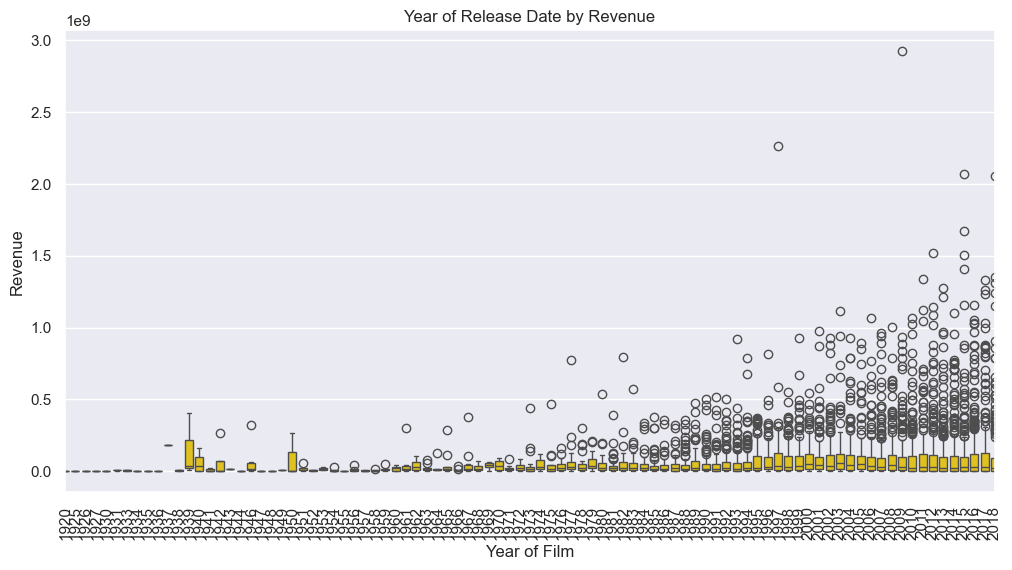

In [230]:
# bivariate year of release with revenue data
fig, dx = plt.subplots()
sns.boxplot(x=train_date.dt.year, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(0, 90))
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

### 16. runtime

runtime is a feature that indicates how long of the entire movie. It is a numerical feature and have a high correlation with the revenue.

We want to know how many missing values are there in the runtime column in the training data and testing data.

In [231]:
print('Number of NA Train for the variable runtime: ' + str(train[train.runtime.isna()].shape[0]))
print('Number of NA Test for the variable runtime: ' + str(test[test.runtime.isna()].shape[0]))

Number of NA Train for the variable runtime: 0
Number of NA Test for the variable runtime: 4


The following plots will show the distribution of the runtime.

C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
C:\Users\zjy\AppData\Local\Temp\ipykernel_10516\485708692.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

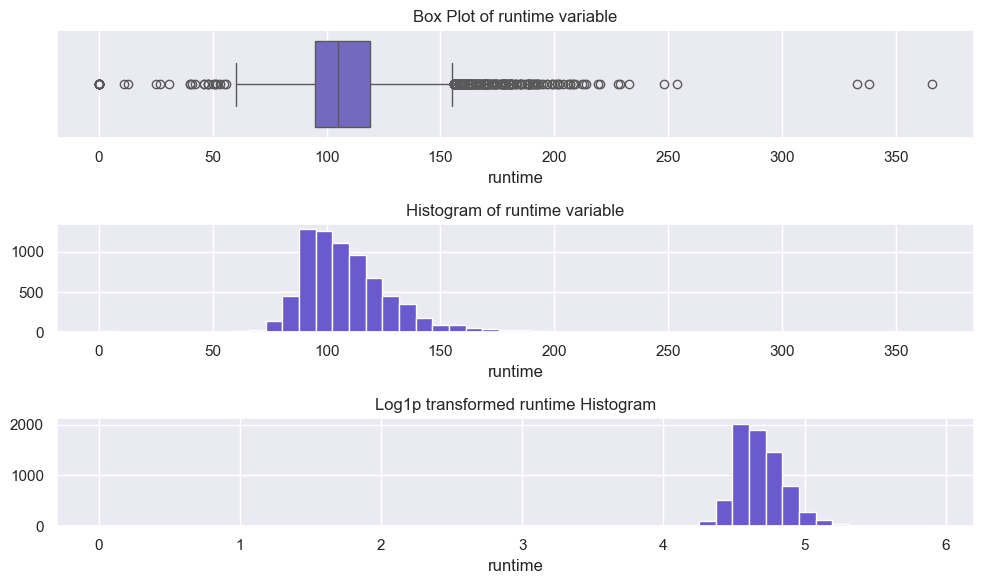

In [232]:
plot_dist('runtime', 'slateblue')

### 17. spoken_language

spoken_language is a feature that indicates the spoken language of the movie.

We want to know how many missing values are there in the spoken_language column in the training data and testing data.

In [233]:
print("Number of NA Train for the variable spoken_languages: " + str(train[train.spoken_languages.isna()].shape[0]))
print("Number of NA Test for the variable spoken_languages: " + str(test[test.spoken_languages.isna()].shape[0]))

Number of NA Train for the variable spoken_languages: 19
Number of NA Test for the variable spoken_languages: 42


We will get the frequency of the words in the spoken_language column in the training data and testing data to find if there are any spoken language that are more frequent than others and might be useful for us.

In [234]:
# count the frequency in the spoken_languages column in the training set
train['spoken_languages'] = train['spoken_languages'].fillna('')
spoken_lang = train['spoken_languages'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
spoken_lang = spoken_lang.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_spoken_lang = spoken_lang.value_counts()
print(freq_spoken_lang.head(20))

spoken_languages
English              4351
English Español       201
日本語                   199
English Français      169
English Italiano       83
Español English        82
Français               79
Español                76
English Pусский        72
Pусский                66
English Deutsch        58
한국어/조선말                58
Français English       56
English 日本語            48
हिन्दी                 46
普通话                    44
English Português      38
Deutsch English        33
Italiano               30
English 普通话            24
Name: count, dtype: int64


In [235]:
# count the frequency in the spoken_languages column in the test set
test['spoken_languages'] = test['spoken_languages'].fillna('')
spoken_lang = test['spoken_languages'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))
spoken_lang = spoken_lang.apply(lambda x: ' '.join(x) if isinstance(x, list) and x != [] else np.nan)
freq_spoken_lang = spoken_lang.value_counts()
print(freq_spoken_lang.head(20))

spoken_languages
English                     2715
English Español              111
English Français             103
Français                      59
Pусский                       58
हिन्दी                        57
English Italiano              53
English Deutsch               49
English Pусский               47
日本語                           46
Español                       38
Español English               36
한국어/조선말                       25
Italiano                      21
普通话                           20
English Português             19
Français English              19
English 日本語                   18
English Français Deutsch      17
Deutsch                       15
Name: count, dtype: int64


### 18. status

Status is a feature that indicates whether the movie is released or not. It is a text feature. We can use this feature as a binary feature in the following feature engineering part.

We want to know how many missing values are there in the status column in the training data and testing data.

In [236]:
print("Number of NA Train for the variable status: " + str(train[train.status.isna()].shape[0]))
print("Number of NA Test for the variable status: " + str(test[test.status.isna()].shape[0]))

Number of NA Train for the variable status: 0
Number of NA Test for the variable status: 2


We will count the number of movies that are released and not released in the training data and testing data.

In [237]:
# count the frequency in the status column in the training set
train['status'] = train['status'].fillna('')
status = train['status'].value_counts()
print(status.head(2))

status
Released    7288
Rumored        4
Name: count, dtype: int64


In [238]:
# count the frequency in the status column in the test set
test['status'] = test['status'].fillna('')
status = test['status'].value_counts()
print(status.head(2))

status
Released           4389
Post Production       5
Name: count, dtype: int64


We will plot the distribution of the status and the revenue.

Text(0.5, 1.0, 'Revenue for a movie and its and status')

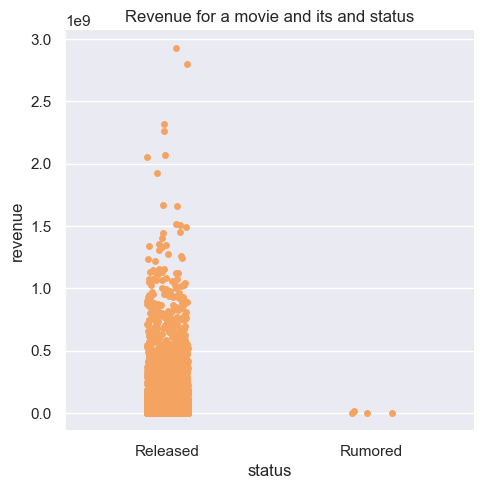

In [239]:
sns.catplot(x='status', y='revenue', color='sandybrown', data=train.loc[train['status'].isin(train['status'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and status')

### 19. tagline

tagline is a feature that indicates the tagline of the movie. It is a text feature. We will use this feature in the following feature engineering part by using NLP and word embedding.

We want to know how many missing values are there in the tagline column in the training data and testing data.

In [240]:
print("Number of NA Train for the variable tagline: " + str(train[train.tagline.isna()].shape[0]))
print("Number of NA Test for the variable tagline: " + str(test[test.tagline.isna()].shape[0]))

Number of NA Train for the variable tagline: 1051
Number of NA Test for the variable tagline: 863


We will get the frequency of the words in the tagline column in the training data and testing data to find if there are any words that are more frequent than others and might be useful for us.

In [241]:
# count the frequency in the tagline column in the training set
train["tagline"] = train["tagline"].fillna("[]")
tagline = "".join(train["tagline"])
tagline = tagline.lower()
tagline = [word for word in tagline.split() if word not in stopWords]
freq_tagline = pd.Series(tagline).value_counts()
print(freq_tagline.head(10))

one      325
will     230
never    201
story    182
man      145
love     133
world    130
new      126
true      99
life      97
Name: count, dtype: int64


(-0.5, 399.5, 199.5, -0.5)

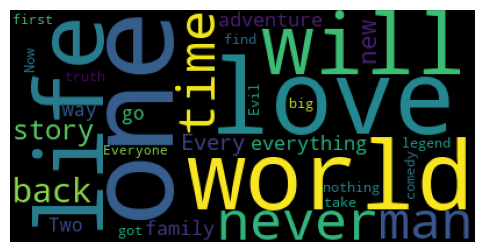

In [242]:
#wordcloud for tagline in the training set
train['tagline'] = train['tagline'].fillna('')
wc_tagline=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_tagline.generate(' '.join(train['tagline']))
plt.figure(figsize=(6,6))
plt.imshow(wc_tagline)
plt.axis('off')

In [243]:
# count the frequency in the tagline column in the test set
test["tagline"] = test["tagline"].fillna("[]")
tagline = "".join(test["tagline"])
tagline = tagline.lower()
tagline = [word for word in tagline.split() if word not in stopWords]
freq_tagline = pd.Series(tagline).value_counts()
print(freq_tagline.head(10))

one      208
will     130
never    118
story    110
love     109
man       88
world     75
new       72
life      68
got       51
Name: count, dtype: int64


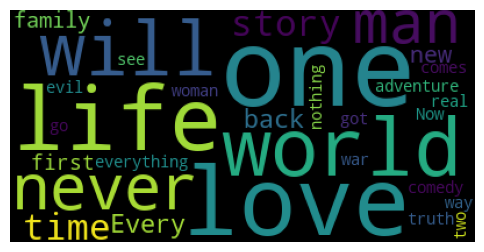

In [244]:
# wordcloud for tagline in the test set
test['tagline'] = test['tagline'].fillna('')
wc_tagline=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_tagline.generate(' '.join(test['tagline']))
plt.figure(figsize=(6,6))
plt.imshow(wc_tagline)
plt.axis('off')
plt.show()

### 20. cast

cast is a feature that indicates the cast of the movie. It is a text feature. We will use this feature in the following feature engineering part if the cast is famous.

We want to know how many missing values are there in the cast column in the training data and testing data.

In [245]:
print("Number of NA Train for the variable cast: " + str(train[train.cast.isna()].shape[0]))
print("Number of NA Test for the variable cast: " + str(test[test.cast.isna()].shape[0]))

Number of NA Train for the variable cast: 13
Number of NA Test for the variable cast: 13


### 21. crew

crew is a feature that indicates the crew of the movie. It is a text feature. We will use this feature in the following feature engineering part if the crew is famous.

We want to know how many missing values are there in the cast column in the training data and testing data.

In [246]:
print("Number of NA Train for the variable crew: " + str(train[train.crew.isna()].shape[0]))
print("Number of NA Test for the variable crew: " + str(test[test.crew.isna()].shape[0]))

Number of NA Train for the variable crew: 15
Number of NA Test for the variable crew: 22


### 22. Title

Title is a feature that indicates the title of the movie. It is a text feature. We will use this feature in the following feature engineering part by using NLP and word embedding.

We want to know how many missing values are there in the title column in the training data and testing data.

In [247]:
print("Number of NA Train for the variable title: " + str(train[train.title.isna()].shape[0]))
print("Number of NA Test for the variable title: " + str(test[test.title.isna()].shape[0]))

Number of NA Train for the variable title: 0
Number of NA Test for the variable title: 3


We will get the frequency of the words in the title column in the training data and testing data to find if there are any words that are more frequent than others and might be useful for us.

In [248]:
# count the frequency in the title column in the training set
train["title"] = train["title"].fillna("[]")
title = "".join(train["title"])
title = title.lower()
title = [word for word in title.split() if word not in stopWords]
freq_title = pd.Series(title).value_counts()
print(freq_title.head(10))

last      55
part      45
2:        44
man       32
legend    25
secret    25
new       25
-         24
lost      23
2the      23
Name: count, dtype: int64


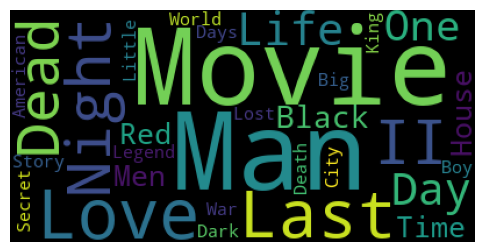

In [249]:
# wordcloud for title in the training set
train['title'] = train['title'].fillna('')
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(train['title']))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

In [250]:
# count the frequency in the title column in the test set
test["title"] = test["title"].fillna("[]")
title = "".join(test["title"])
title = title.lower()
title = [word for word in title.split() if word not in stopWords]
freq_title = pd.Series(title).value_counts()
print(freq_title.head(10))

man       25
2:        20
part      18
last      17
big       17
legend    16
night     14
ii:       14
new       13
time      13
Name: count, dtype: int64


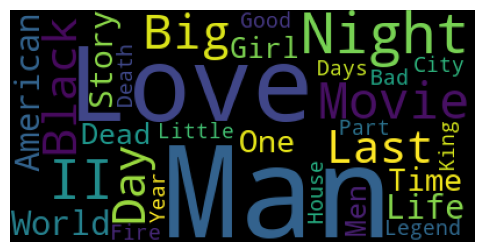

In [251]:
# wordcloud for title in the test set
test['title'] = test['title'].fillna('')
wc_title=wordcloud.WordCloud(background_color='black',max_words=30,stopwords=None,mask=None,random_state=None,max_font_size=None,font_step=1,mode='RGB',relative_scaling='auto',colormap='viridis',normalize_plurals=False)
wc_title.generate(' '.join(test['title']))
plt.figure(figsize=(6,6))
plt.imshow(wc_title)
plt.axis('off')
plt.show()

## Feature Correlation

### True Value

We also find some true value of the data online. We will use the data set with true value to check the corrlations between the features and revenue.

In [252]:
train_true=train.__deepcopy__()
test_true=test.__deepcopy__()

In [253]:
train_true.loc[train_true['id'] == 16,'revenue'] = 192864         
train_true.loc[train_true['id'] == 90,'budget'] = 30000000                  
train_true.loc[train_true['id'] == 118,'budget'] = 60000000       
train_true.loc[train_true['id'] == 149,'budget'] = 18000000       
train_true.loc[train_true['id'] == 313,'revenue'] = 12000000       
train_true.loc[train_true['id'] == 451,'revenue'] = 12000000      
train_true.loc[train_true['id'] == 464,'budget'] = 20000000       
train_true.loc[train_true['id'] == 470,'budget'] = 13000000       
train_true.loc[train_true['id'] == 513,'budget'] = 930000         
train_true.loc[train_true['id'] == 797,'budget'] = 8000000        
train_true.loc[train_true['id'] == 819,'budget'] = 90000000       
train_true.loc[train_true['id'] == 850,'budget'] = 90000000       
train_true.loc[train_true['id'] == 1007,'budget'] = 2              
train_true.loc[train_true['id'] == 1112,'budget'] = 7500000       
train_true.loc[train_true['id'] == 1131,'budget'] = 4300000        
train_true.loc[train_true['id'] == 1359,'budget'] = 10000000       
train_true.loc[train_true['id'] == 1542,'budget'] = 1             
train_true.loc[train_true['id'] == 1570,'budget'] = 15800000       
train_true.loc[train_true['id'] == 1571,'budget'] = 4000000        
train_true.loc[train_true['id'] == 1714,'budget'] = 46000000       
train_true.loc[train_true['id'] == 1721,'budget'] = 17500000       
train_true.loc[train_true['id'] == 1865,'revenue'] = 25000000      
train_true.loc[train_true['id'] == 1885,'budget'] = 12             
train_true.loc[train_true['id'] == 2091,'budget'] = 10             
train_true.loc[train_true['id'] == 2268,'budget'] = 17500000       
train_true.loc[train_true['id'] == 2491,'budget'] = 6              
train_true.loc[train_true['id'] == 2602,'budget'] = 31000000       
train_true.loc[train_true['id'] == 2612,'budget'] = 15000000       
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000      
train_true.loc[train_true['id'] == 2801,'budget'] = 10000000       
train_true.loc[train_true['id'] == 335,'budget'] = 2 
train_true.loc[train_true['id'] == 348,'budget'] = 12
train_true.loc[train_true['id'] == 470,'budget'] = 13000000 
train_true.loc[train_true['id'] == 513,'budget'] = 1100000
train_true.loc[train_true['id'] == 640,'budget'] = 6 
train_true.loc[train_true['id'] == 696,'budget'] = 1
train_true.loc[train_true['id'] == 797,'budget'] = 8000000 
train_true.loc[train_true['id'] == 850,'budget'] = 1500000
train_true.loc[train_true['id'] == 1199,'budget'] = 5 
train_true.loc[train_true['id'] == 1282,'budget'] = 9              
train_true.loc[train_true['id'] == 1347,'budget'] = 1
train_true.loc[train_true['id'] == 1755,'budget'] = 2
train_true.loc[train_true['id'] == 1801,'budget'] = 5
train_true.loc[train_true['id'] == 1918,'budget'] = 592 
train_true.loc[train_true['id'] == 2033,'budget'] = 4
train_true.loc[train_true['id'] == 2118,'budget'] = 344 
train_true.loc[train_true['id'] == 2252,'budget'] = 130
train_true.loc[train_true['id'] == 2256,'budget'] = 1 
train_true.loc[train_true['id'] == 2696,'budget'] = 10000000

In [254]:
test_true.loc[test_true['id'] == 3033,'budget'] = 250 
test_true.loc[test_true['id'] == 3051,'budget'] = 50
test_true.loc[test_true['id'] == 3084,'budget'] = 337
test_true.loc[test_true['id'] == 3224,'budget'] = 4  
test_true.loc[test_true['id'] == 3594,'budget'] = 25  
test_true.loc[test_true['id'] == 3619,'budget'] = 500  
test_true.loc[test_true['id'] == 3831,'budget'] = 3  
test_true.loc[test_true['id'] == 3935,'budget'] = 500  
test_true.loc[test_true['id'] == 4049,'budget'] = 995946 
test_true.loc[test_true['id'] == 4424,'budget'] = 3  
test_true.loc[test_true['id'] == 4460,'budget'] = 8  
test_true.loc[test_true['id'] == 4555,'budget'] = 1200000 
test_true.loc[test_true['id'] == 4624,'budget'] = 30 
test_true.loc[test_true['id'] == 4645,'budget'] = 500 
test_true.loc[test_true['id'] == 4709,'budget'] = 450 
test_true.loc[test_true['id'] == 4839,'budget'] = 7
test_true.loc[test_true['id'] == 3125,'budget'] = 25 
test_true.loc[test_true['id'] == 3142,'budget'] = 1
test_true.loc[test_true['id'] == 3201,'budget'] = 450
test_true.loc[test_true['id'] == 3222,'budget'] = 6
test_true.loc[test_true['id'] == 3545,'budget'] = 38
test_true.loc[test_true['id'] == 3670,'budget'] = 18
test_true.loc[test_true['id'] == 3792,'budget'] = 19
test_true.loc[test_true['id'] == 3881,'budget'] = 7
test_true.loc[test_true['id'] == 3969,'budget'] = 400
test_true.loc[test_true['id'] == 4196,'budget'] = 6
test_true.loc[test_true['id'] == 4221,'budget'] = 11
test_true.loc[test_true['id'] == 4222,'budget'] = 500
test_true.loc[test_true['id'] == 4285,'budget'] = 11
test_true.loc[test_true['id'] == 4319,'budget'] = 1
test_true.loc[test_true['id'] == 4639,'budget'] = 10
test_true.loc[test_true['id'] == 4719,'budget'] = 45
test_true.loc[test_true['id'] == 4822,'budget'] = 22
test_true.loc[test_true['id'] == 4829,'budget'] = 20
test_true.loc[test_true['id'] == 4969,'budget'] = 20
test_true.loc[test_true['id'] == 5021,'budget'] = 40 
test_true.loc[test_true['id'] == 5035,'budget'] = 1 
test_true.loc[test_true['id'] == 5063,'budget'] = 14 
test_true.loc[test_true['id'] == 5119,'budget'] = 2 
test_true.loc[test_true['id'] == 5214,'budget'] = 30 
test_true.loc[test_true['id'] == 5221,'budget'] = 50 
test_true.loc[test_true['id'] == 4903,'budget'] = 15
test_true.loc[test_true['id'] == 4983,'budget'] = 3
test_true.loc[test_true['id'] == 5102,'budget'] = 28
test_true.loc[test_true['id'] == 5217,'budget'] = 75
test_true.loc[test_true['id'] == 5224,'budget'] = 3 
test_true.loc[test_true['id'] == 5469,'budget'] = 20 
test_true.loc[test_true['id'] == 5840,'budget'] = 1 
test_true.loc[test_true['id'] == 5960,'budget'] = 30
test_true.loc[test_true['id'] == 6506,'budget'] = 11 
test_true.loc[test_true['id'] == 6553,'budget'] = 280
test_true.loc[test_true['id'] == 6561,'budget'] = 7
test_true.loc[test_true['id'] == 6582,'budget'] = 218
test_true.loc[test_true['id'] == 6638,'budget'] = 5
test_true.loc[test_true['id'] == 6749,'budget'] = 8 
test_true.loc[test_true['id'] == 6759,'budget'] = 50 
test_true.loc[test_true['id'] == 6856,'budget'] = 10
test_true.loc[test_true['id'] == 6858,'budget'] =  100
test_true.loc[test_true['id'] == 6876,'budget'] =  250
test_true.loc[test_true['id'] == 6972,'budget'] = 1
test_true.loc[test_true['id'] == 7079,'budget'] = 8000000
test_true.loc[test_true['id'] == 7150,'budget'] = 118
test_true.loc[test_true['id'] == 6506,'budget'] = 118
test_true.loc[test_true['id'] == 7225,'budget'] = 6
test_true.loc[test_true['id'] == 7231,'budget'] = 85
test_true.loc[test_true['id'] == 5222,'budget'] = 5
test_true.loc[test_true['id'] == 5322,'budget'] = 90
test_true.loc[test_true['id'] == 5350,'budget'] = 70
test_true.loc[test_true['id'] == 5378,'budget'] = 10
test_true.loc[test_true['id'] == 5545,'budget'] = 80
test_true.loc[test_true['id'] == 5810,'budget'] = 8
test_true.loc[test_true['id'] == 5926,'budget'] = 300
test_true.loc[test_true['id'] == 5927,'budget'] = 4
test_true.loc[test_true['id'] == 5986,'budget'] = 1
test_true.loc[test_true['id'] == 6053,'budget'] = 20
test_true.loc[test_true['id'] == 6104,'budget'] = 1
test_true.loc[test_true['id'] == 6130,'budget'] = 30
test_true.loc[test_true['id'] == 6301,'budget'] = 150
test_true.loc[test_true['id'] == 6276,'budget'] = 100
test_true.loc[test_true['id'] == 6473,'budget'] = 100
test_true.loc[test_true['id'] == 6842,'budget'] = 30

In [255]:
cols_to_drop = ['adult', 'backdrop_path', 'video', 'vote_count', 'vote_average']
train.drop(cols_to_drop, axis=1, inplace=True)
train_true.drop(cols_to_drop, axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Value count By Features')

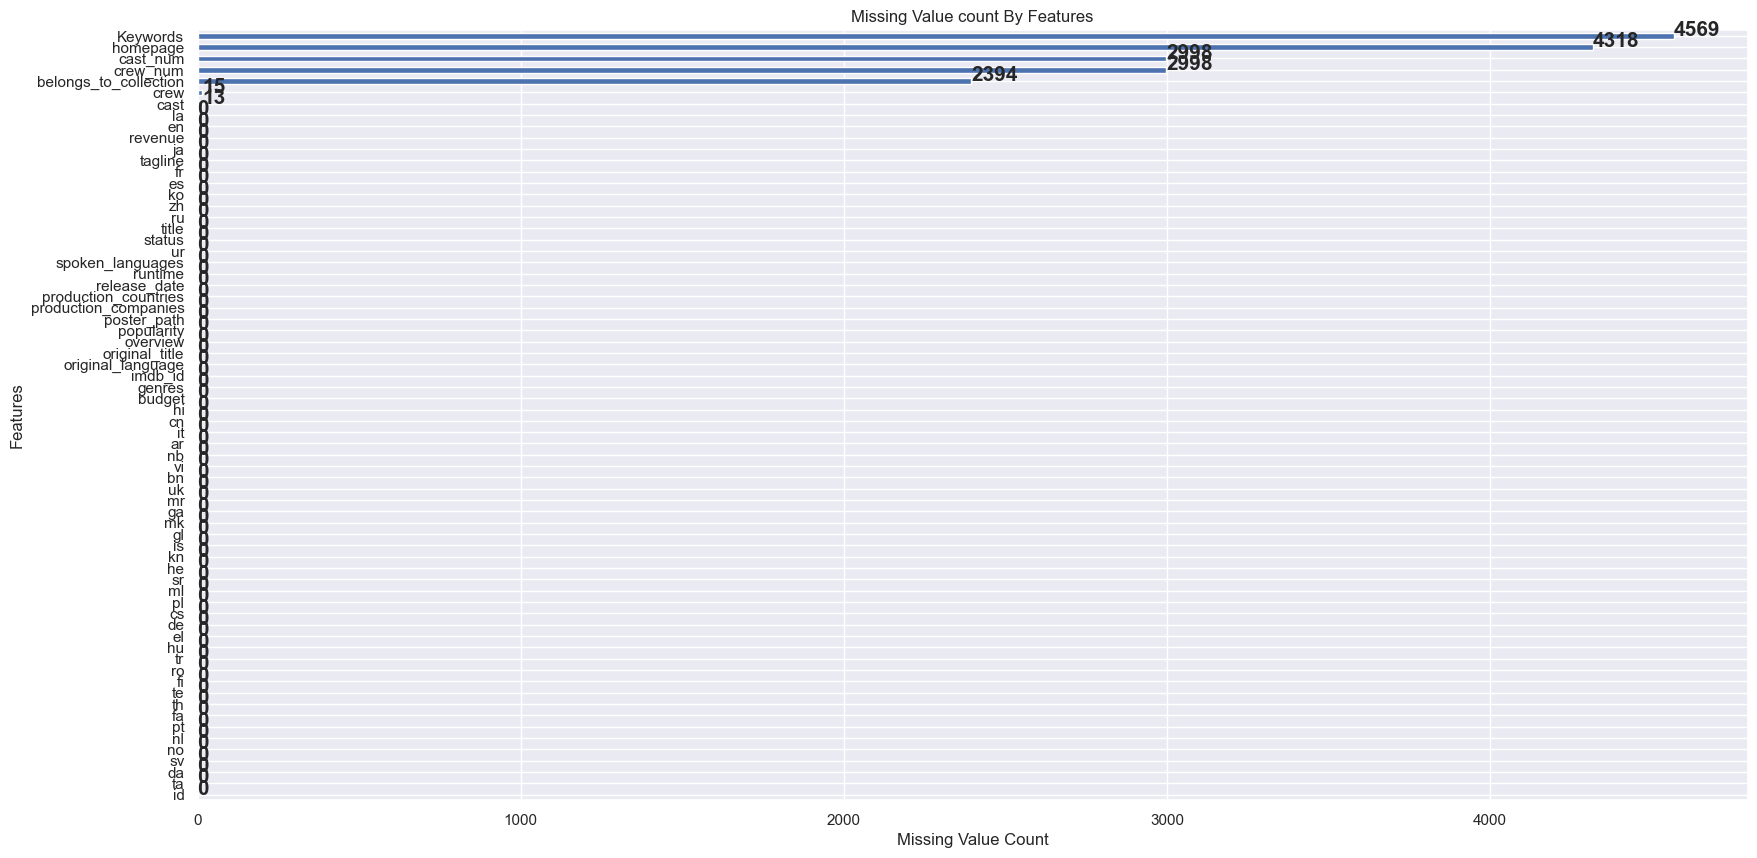

In [256]:
train_true.isna().sum().sort_values(ascending=True).plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train_true.isna().sum().sort_values(ascending=True)):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

<Axes: xlabel='budget', ylabel='revenue'>

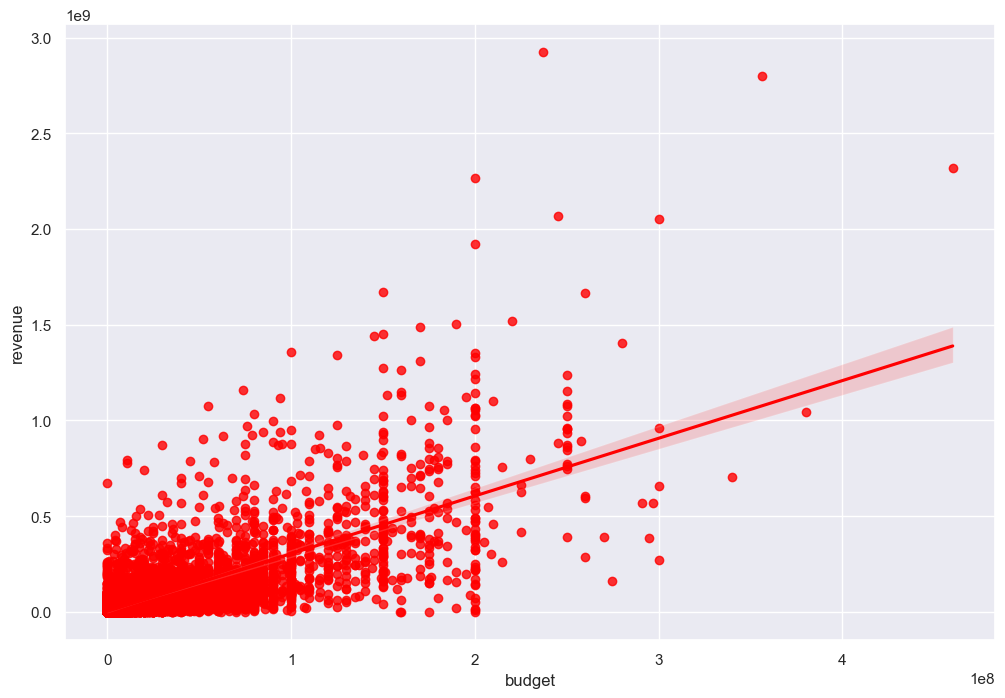

In [257]:
sns.regplot(x="budget", y="revenue", data = train_true, color = 'red')

<Axes: xlabel='popularity', ylabel='revenue'>

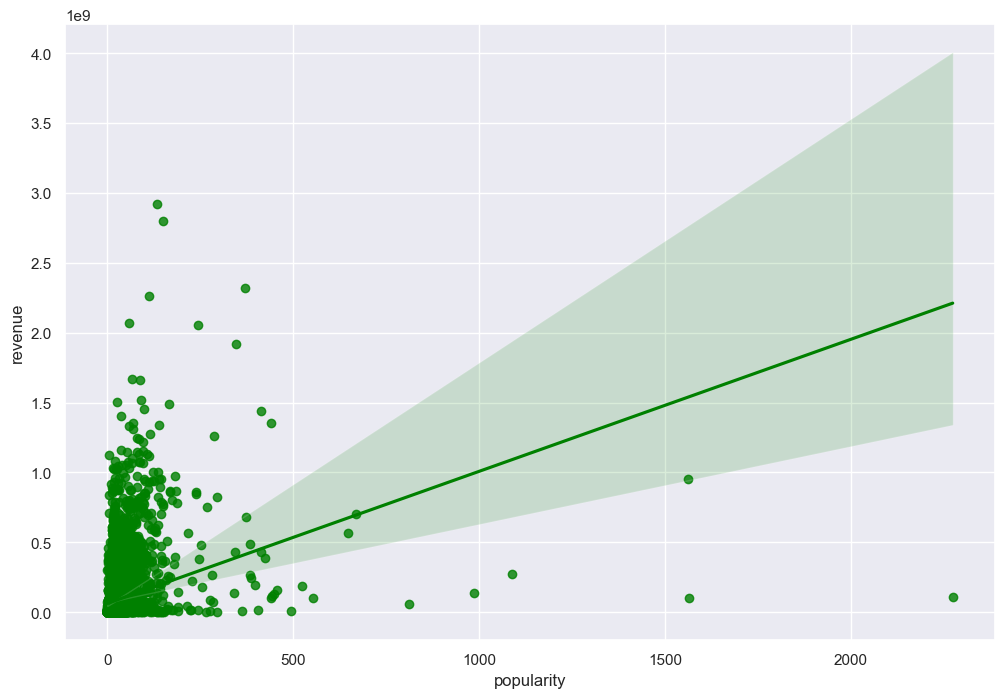

In [258]:
sns.regplot(x="popularity", y="revenue", data = train_true, color = 'green')

<Axes: xlabel='runtime', ylabel='revenue'>

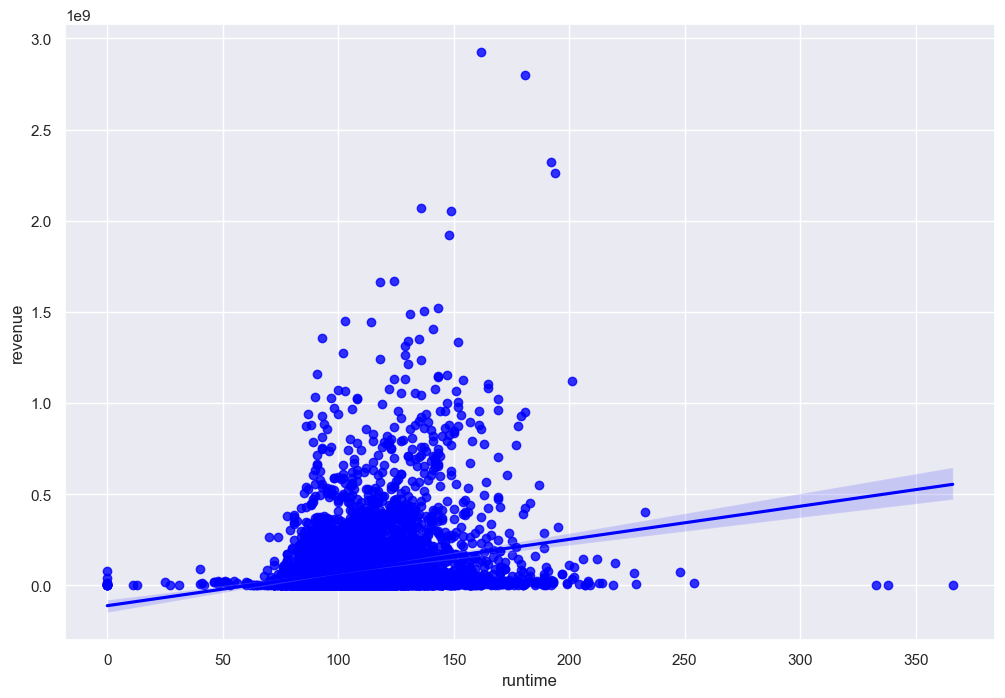

In [259]:
sns.regplot(x="runtime", y="revenue", data = train_true, color = 'blue')

<Axes: xlabel='cast_num', ylabel='revenue'>

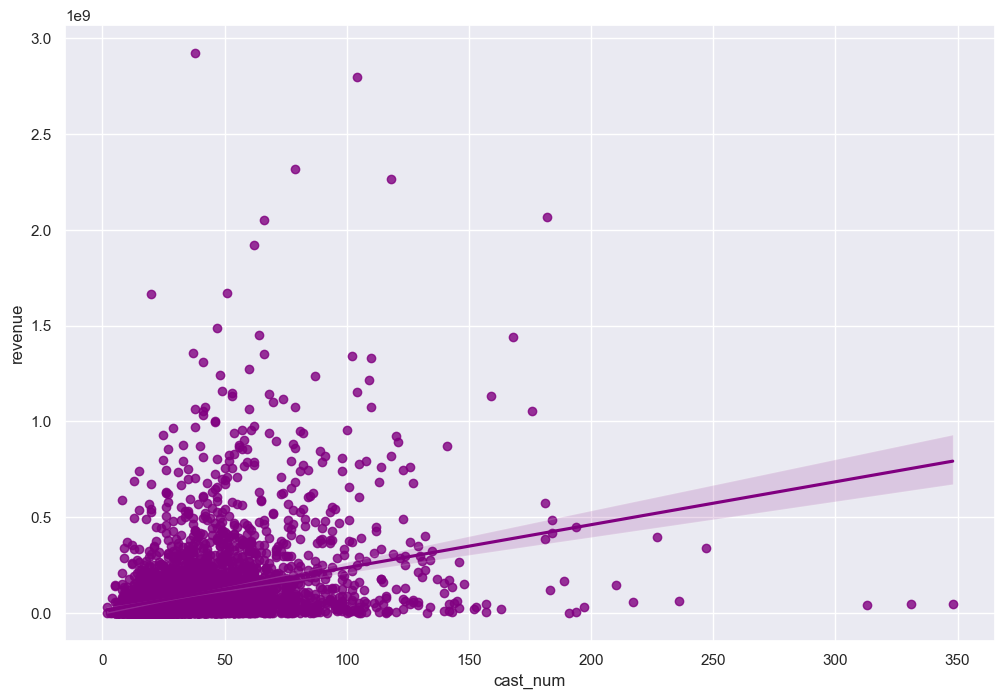

In [260]:
sns.regplot(x="cast_num", y="revenue", data = train_true, color = 'purple')

<Axes: xlabel='crew_num', ylabel='revenue'>

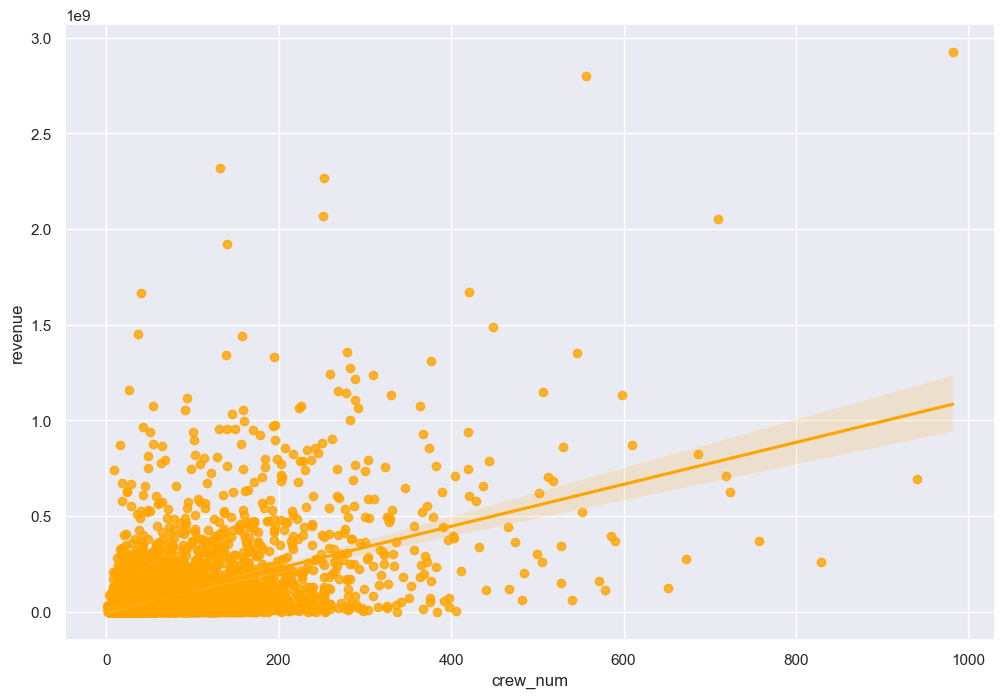

In [261]:
sns.regplot(x="crew_num", y="revenue", data = train_true, color = 'orange')

In [262]:
#Add log revenue & log budget to data
train_true['log_revenue'] = np.log1p(train['revenue'])
train_true['log_budget'] = np.log1p(train['budget'])
train_true.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ga,mr,uk,bn,vi,nb,ur,la,log_revenue,log_budget
count,7292.000000,4898,7.292000e+03,7292,2974,7292,7292,7292,7292,7292.000000,...,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
unique,NaN,1225,NaN,2205,2942,7292,44,7112,7285,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.naruto-movie.com/,tt2637294,en,The Little Mermaid,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3007,NaN,265,5,1,6158,3,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.000274,NaN,2.777029e+07,NaN,NaN,NaN,NaN,NaN,NaN,25.162723,...,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,16.520224,12.789248
std,0.016560,NaN,4.267524e+07,NaN,NaN,NaN,NaN,NaN,NaN,54.261198,...,0.011711,0.011711,0.011711,0.011711,0.011711,0.011711,0.011711,0.011711,2.656393,7.103505
min,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,0.000000,NaN,5.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,8.655787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.365433,13.122365
50%,0.000000,NaN,1.200000e+07,NaN,NaN,NaN,NaN,NaN,NaN,17.172000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.024141,16.300417
75%,0.000000,NaN,3.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,26.568000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.290551,17.370859


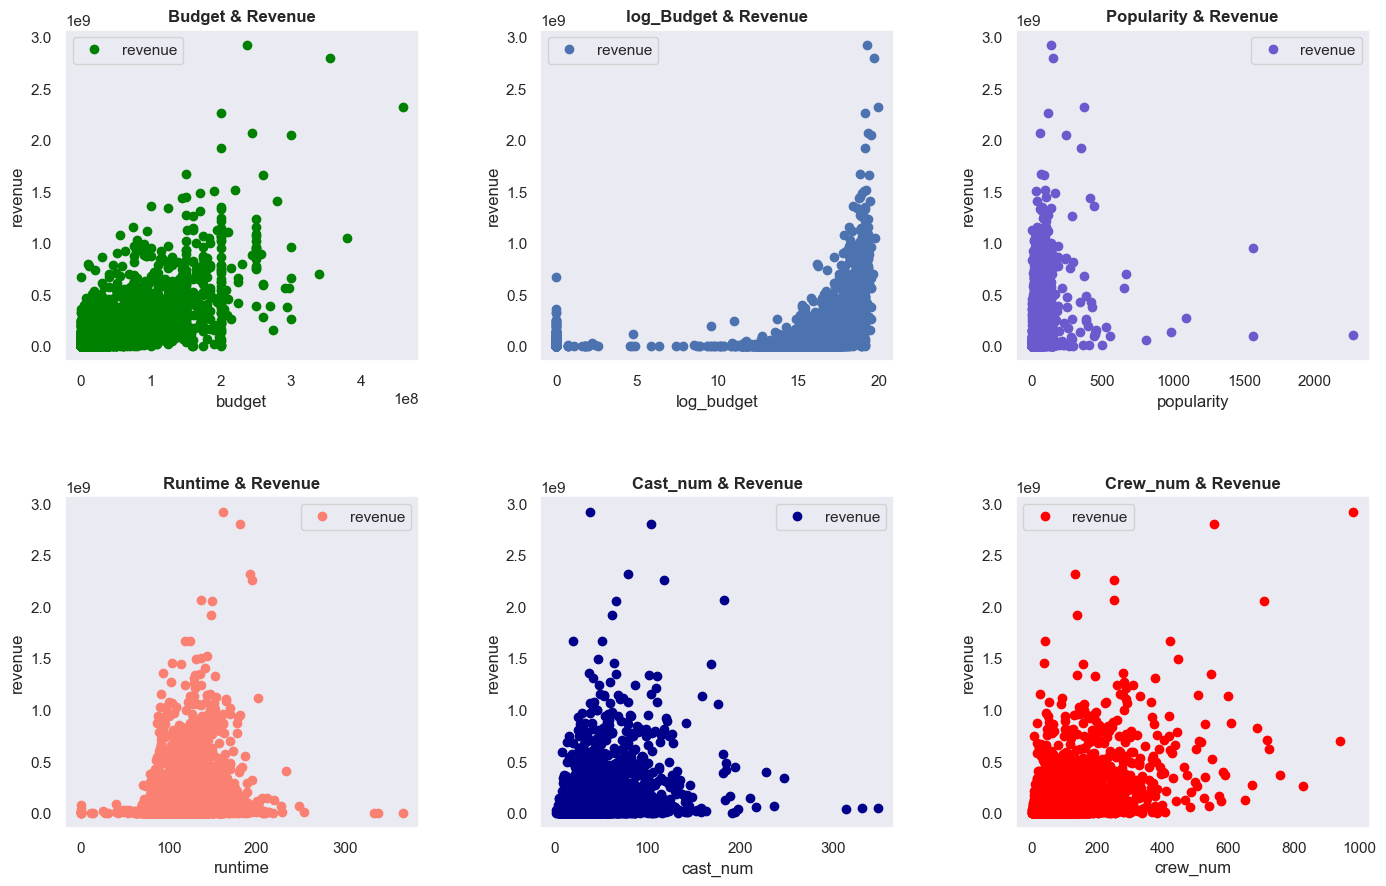

In [263]:
#Original Value set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_true.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Budget & Revenue', fontweight="bold")
ax[0][0].grid()

train_true.plot(ax=ax[0][1], x='log_budget', y='revenue', style='o', ylabel= 'revenue').set_title('log_Budget & Revenue', fontweight="bold")
ax[0][1].grid()

train_true.plot(ax=ax[0][2], x='popularity', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Popularity & Revenue', fontweight="bold")
ax[0][2].grid()

train_true.plot(ax=ax[1][0], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='salmon').set_title('Runtime & Revenue', fontweight="bold")
ax[1][0].grid()

train_true.plot(ax=ax[1][1], x='cast_num', y='revenue', style='o', ylabel= 'revenue', color='DarkBlue').set_title('Cast_num & Revenue', fontweight="bold")
ax[1][1].grid()

train_true.plot(ax=ax[1][2], x='crew_num', y='revenue', style='o', ylabel= 'revenue', color='red').set_title('Crew_num & Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

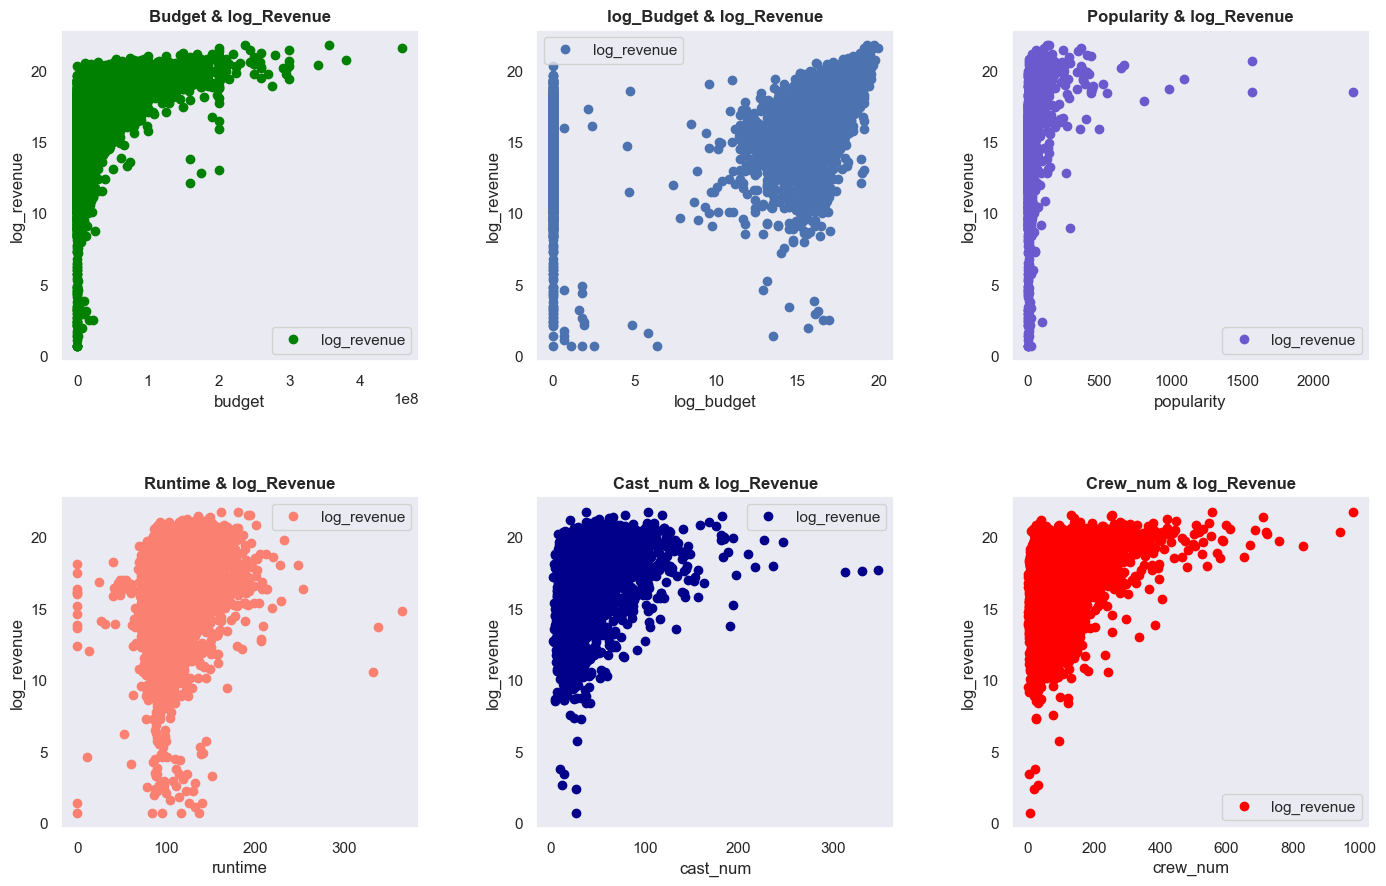

In [264]:
#Original Value set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_true.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_true.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_true.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_true.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_true.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_true.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.518822  0.728215    0.304409    0.290210   
log_revenue  0.518822     1.000000  0.509256    0.510493    0.193632   
budget       0.728215     0.509256  1.000000    0.476405    0.283523   
log_budget   0.304409     0.510493  0.476405    1.000000    0.125599   
popularity   0.290210     0.193632  0.283523    0.125599    1.000000   
runtime      0.223769     0.215146  0.245488    0.181901    0.089806   
cast_num     0.305195     0.319372  0.337723    0.285778    0.073340   
crew_num     0.478027     0.357693  0.524430    0.254499    0.158322   

              runtime  cast_num  crew_num  
revenue      0.223769  0.305195  0.478027  
log_revenue  0.215146  0.319372  0.357693  
budget       0.245488  0.337723  0.524430  
log_budget   0.181901  0.285778  0.254499  
popularity   0.089806  0.073340  0.158322  
runtime      1.000000  0.341924  0.171717  
cast_num     0.341924  1.000000  0.270079  

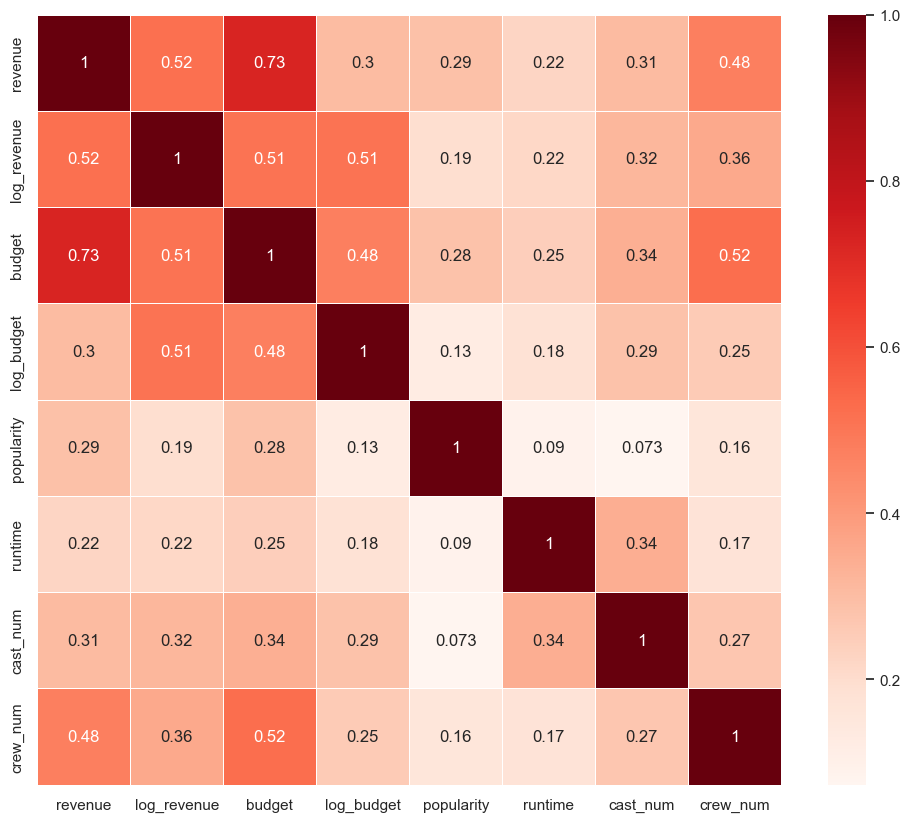

In [265]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr = train_true[col].corr()

sns.heatmap(corr, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr)

In [266]:
error = train_true[(train_true['revenue'] == 0) | (train_true['budget'] == 0)]
non_error = train_true[(train_true['budget'] != 0) & (train_true['revenue'] != 0)]
print('Number of data points with zero budget or revenue: ', len(error))

Number of data points with zero budget or revenue:  1657


In [267]:
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error[non_error['log_budget'] < 10]
error = error._append(temp, ignore_index=True)
non_error = non_error[non_error['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error[non_error['log_revenue'] < 7.5]
error = error._append(temp, ignore_index=True)
non_error = non_error[non_error['log_revenue'] >= 7.5]

In [268]:
train_res = non_error.dropna(thresh=22)
#preserve rows with more than "thresh" values
train_res.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ga,mr,uk,bn,vi,nb,ur,la,log_revenue,log_budget
count,5588.000000,3935,5.588000e+03,5588,2430,5588,5588,5588,5588,5588.000000,...,5588.0,5588.000000,5588.000000,5588.0,5588.000000,5588.000000,5588.000000,5588.000000,5588.000000,5588.000000
unique,NaN,1040,NaN,1850,2403,5588,39,5460,5584,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt2637294,en,Robin Hood,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2369,NaN,167,4,1,4999,3,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.000358,NaN,3.622397e+07,NaN,NaN,NaN,NaN,NaN,NaN,27.989123,...,0.0,0.000179,0.000179,0.0,0.000179,0.000179,0.000179,0.000179,17.197075,16.626851
std,0.018917,NaN,4.550319e+07,NaN,NaN,NaN,NaN,NaN,NaN,60.544898,...,0.0,0.013377,0.013377,0.0,0.013377,0.013377,0.013377,0.013377,2.039477,1.460252
min,0.000000,NaN,2.455400e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.003013,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.569928,10.108671
25%,0.000000,NaN,7.068028e+06,NaN,NaN,NaN,NaN,NaN,NaN,10.337918,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,16.200036,15.771091
50%,0.000000,NaN,2.000000e+07,NaN,NaN,NaN,NaN,NaN,NaN,18.369000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.510993,16.811243
75%,0.000000,NaN,4.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN,29.131500,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,18.586809,17.622173


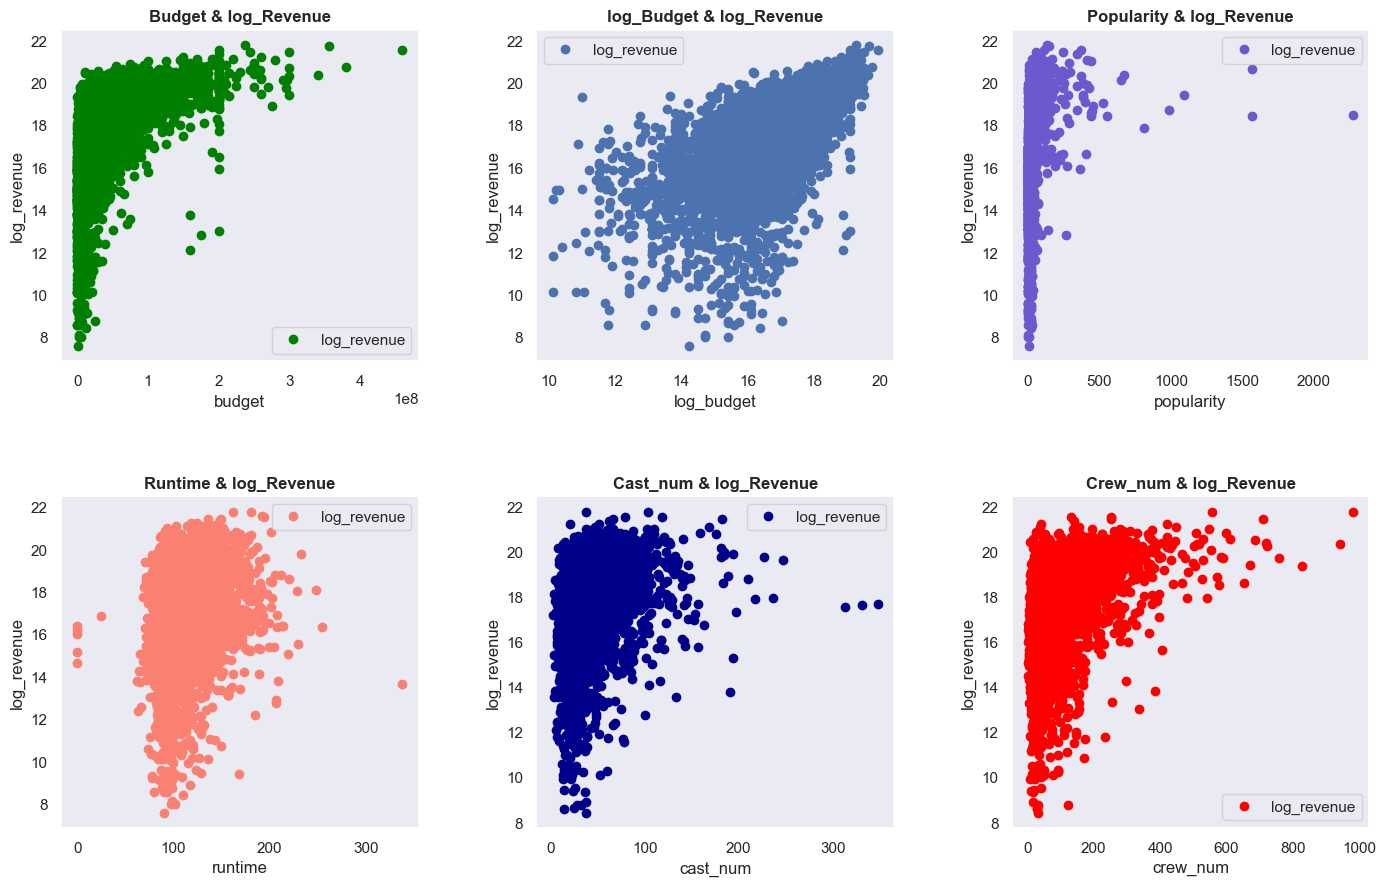

In [269]:
#True Value set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_res.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_res.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_res.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_res.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_res.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_res.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.598881  0.715621    0.488330    0.281811   
log_revenue  0.598881     1.000000  0.549696    0.636069    0.205162   
budget       0.715621     0.549696  1.000000    0.743118    0.273927   
log_budget   0.488330     0.636069  0.743118    1.000000    0.193908   
popularity   0.281811     0.205162  0.273927    0.193908    1.000000   
runtime      0.218569     0.194590  0.234802    0.221995    0.093065   
cast_num     0.279347     0.281655  0.290386    0.283245    0.063464   
crew_num     0.475916     0.375338  0.519715    0.446187    0.153751   

              runtime  cast_num  crew_num  
revenue      0.218569  0.279347  0.475916  
log_revenue  0.194590  0.281655  0.375338  
budget       0.234802  0.290386  0.519715  
log_budget   0.221995  0.283245  0.446187  
popularity   0.093065  0.063464  0.153751  
runtime      1.000000  0.331920  0.169019  
cast_num     0.331920  1.000000  0.240268  

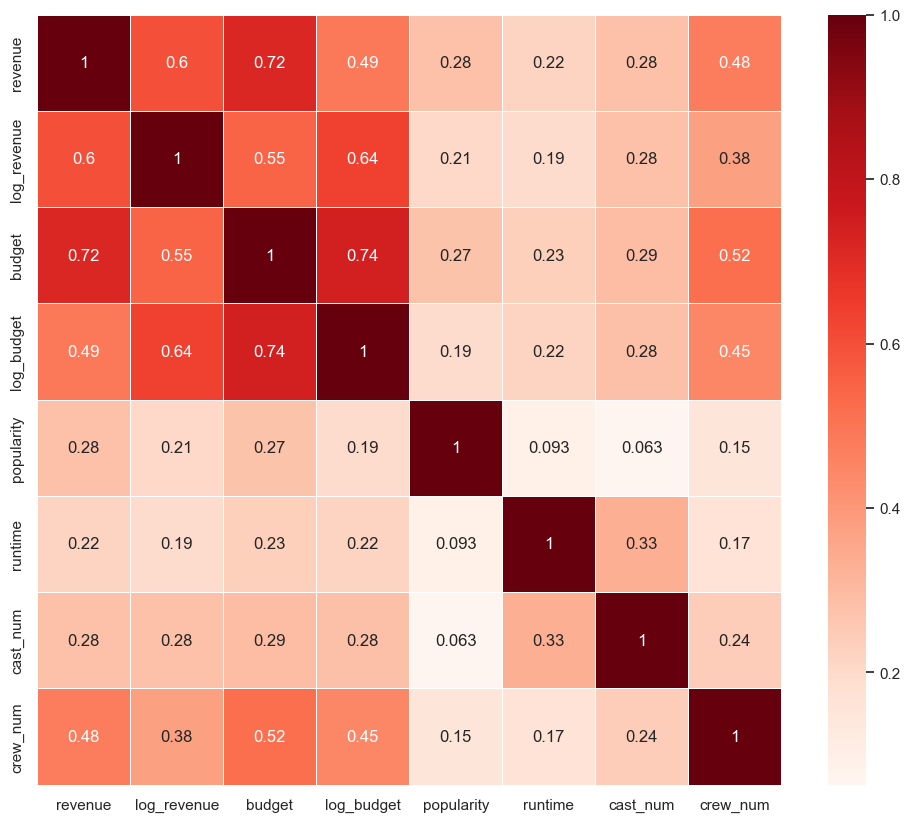

In [270]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr2 = train_res[col].corr()

sns.heatmap(corr2, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr2)

In [271]:
train_err = error
train_err.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ga,mr,uk,bn,vi,nb,ur,la,log_revenue,log_budget
count,1704.0,963,1.704000e+03,1704,544,1704,1704,1704,1704,1704.000000,...,1704.000000,1704.0,1704.0,1704.000000,1704.0,1704.0,1704.0,1704.0,1704.000000,1704.000000
unique,NaN,247,NaN,759,539,1704,31,1699,1703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,[null],NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.naruto-movie.com/,tt1380152,en,Flashback,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,638,NaN,98,5,1,1159,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.0,NaN,4.777820e+04,NaN,NaN,NaN,NaN,NaN,NaN,15.893991,...,0.000587,0.0,0.0,0.000587,0.0,0.0,0.0,0.0,14.300599,0.204431
std,0.0,NaN,8.230006e+05,NaN,NaN,NaN,NaN,NaN,NaN,21.613129,...,0.024225,0.0,0.0,0.024225,0.0,0.0,0.0,0.0,3.183031,1.497276
min,0.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.693147,0.000000
25%,0.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.575389,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,12.809335,0.000000
50%,0.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,12.422000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.988381,0.000000
75%,0.0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,20.438500,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,16.524790,0.000000


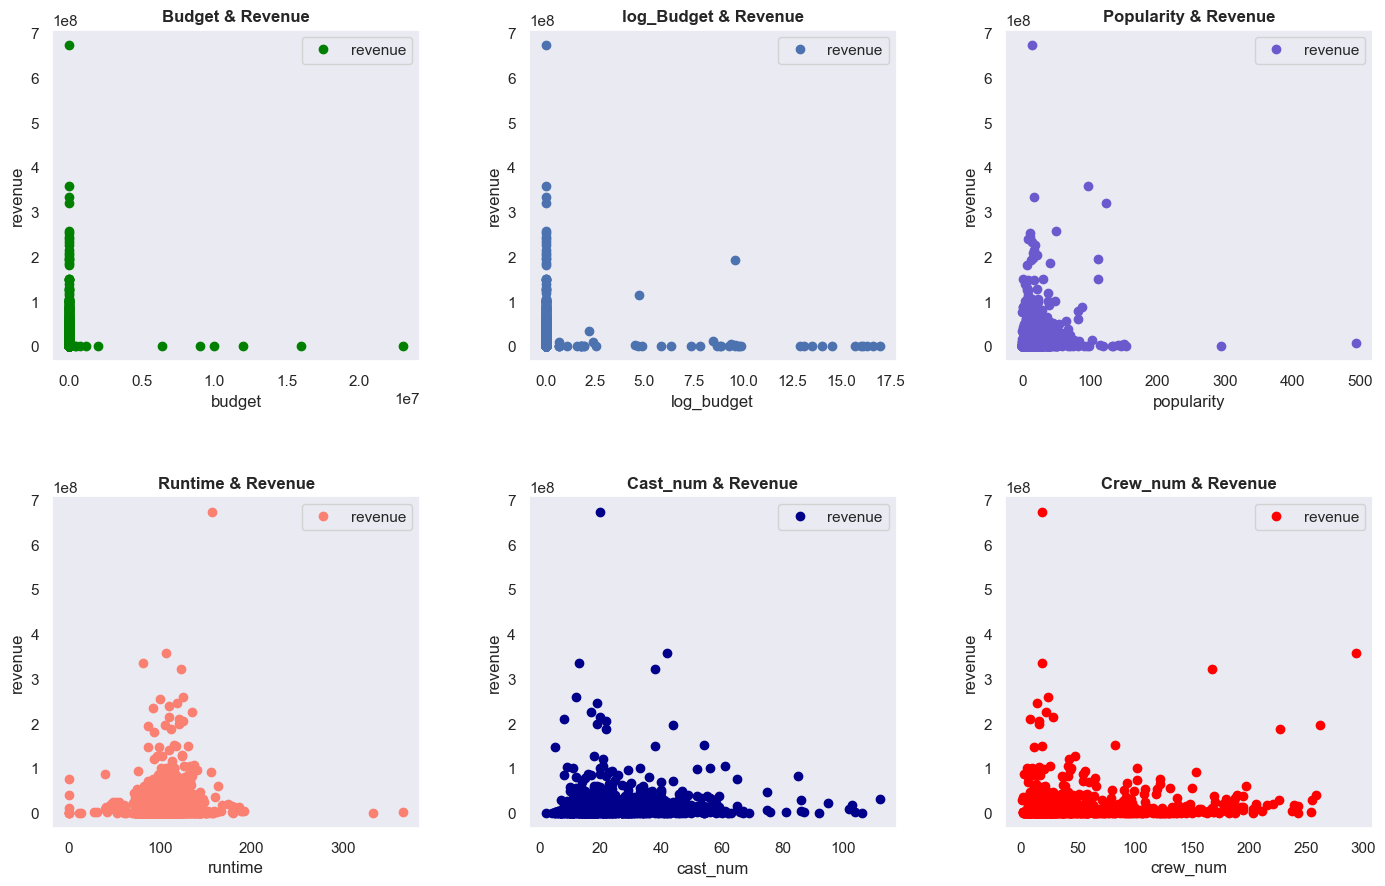

In [272]:
#Error set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_err.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Budget & Revenue', fontweight="bold")
ax[0][0].grid()

train_err.plot(ax=ax[0][1], x='log_budget', y='revenue', style='o', ylabel= 'revenue').set_title('log_Budget & Revenue', fontweight="bold")
ax[0][1].grid()

train_err.plot(ax=ax[0][2], x='popularity', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Popularity & Revenue', fontweight="bold")
ax[0][2].grid()

train_err.plot(ax=ax[1][0], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='salmon').set_title('Runtime & Revenue', fontweight="bold")
ax[1][0].grid()

train_err.plot(ax=ax[1][1], x='cast_num', y='revenue', style='o', ylabel= 'revenue', color='DarkBlue').set_title('Cast_num & Revenue', fontweight="bold")
ax[1][1].grid()

train_err.plot(ax=ax[1][2], x='crew_num', y='revenue', style='o', ylabel= 'revenue', color='red').set_title('Crew_num & Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

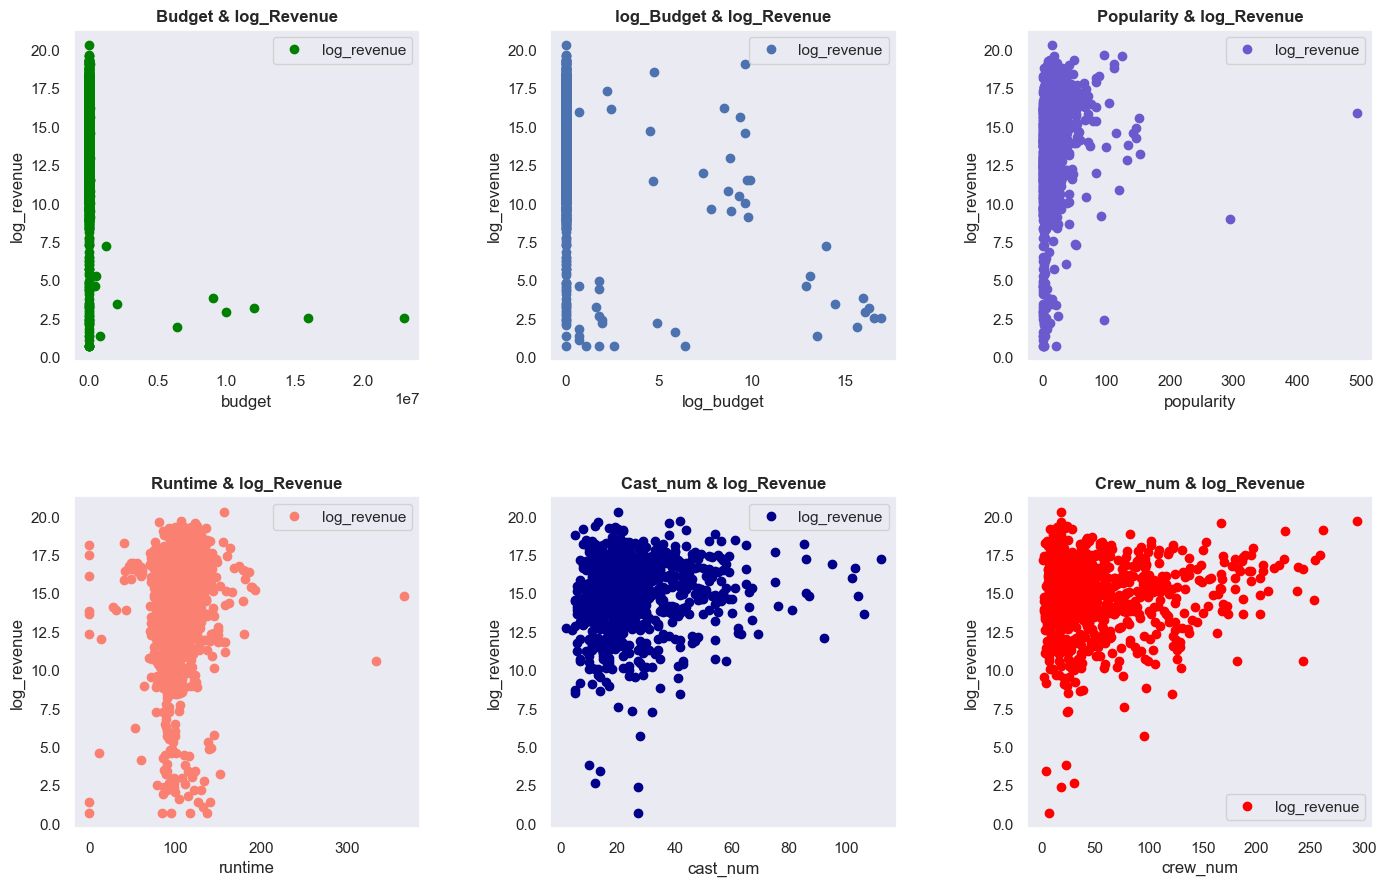

In [273]:
#Error set
fig, ax = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)

train_err.plot(ax=ax[0][0], x='budget', y='log_revenue', style='o', ylabel= 'log_revenue', color='green').set_title('Budget & log_Revenue', fontweight="bold")
ax[0][0].grid()

train_err.plot(ax=ax[0][1], x='log_budget', y='log_revenue', style='o', ylabel= 'log_revenue').set_title('log_Budget & log_Revenue', fontweight="bold")
ax[0][1].grid()

train_err.plot(ax=ax[0][2], x='popularity', y='log_revenue', style='o', ylabel= 'log_revenue', color='slateblue').set_title('Popularity & log_Revenue', fontweight="bold")
ax[0][2].grid()

train_err.plot(ax=ax[1][0], x='runtime', y='log_revenue', style='o', ylabel= 'log_revenue', color='salmon').set_title('Runtime & log_Revenue', fontweight="bold")
ax[1][0].grid()

train_err.plot(ax=ax[1][1], x='cast_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='DarkBlue').set_title('Cast_num & log_Revenue', fontweight="bold")
ax[1][1].grid()

train_err.plot(ax=ax[1][2], x='crew_num', y='log_revenue', style='o', ylabel= 'log_revenue', color='red').set_title('Crew_num & log_Revenue', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

              revenue  log_revenue    budget  log_budget  popularity  \
revenue      1.000000     0.449528 -0.024307   -0.027131    0.114179   
log_revenue  0.449528     1.000000 -0.207678   -0.303576    0.138330   
budget      -0.024307    -0.207678  1.000000    0.623821   -0.030172   
log_budget  -0.027131    -0.303576  0.623821    1.000000   -0.039671   
popularity   0.114179     0.138330 -0.030172   -0.039671    1.000000   
runtime      0.114321     0.112470 -0.003754   -0.063674   -0.040368   
cast_num     0.023124     0.112634 -0.067073   -0.074773   -0.068280   
crew_num     0.055181     0.073284 -0.045668   -0.060897    0.037546   

              runtime  cast_num  crew_num  
revenue      0.114321  0.023124  0.055181  
log_revenue  0.112470  0.112634  0.073284  
budget      -0.003754 -0.067073 -0.045668  
log_budget  -0.063674 -0.074773 -0.060897  
popularity  -0.040368 -0.068280  0.037546  
runtime      1.000000  0.311136  0.057900  
cast_num     0.311136  1.000000  0.201137  

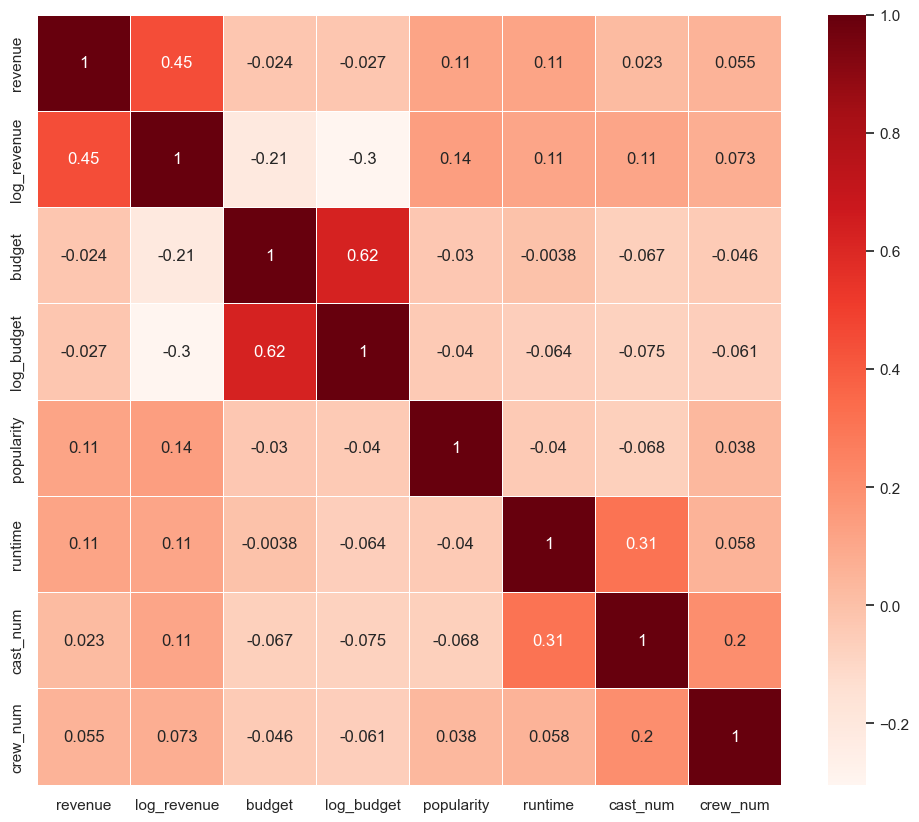

In [274]:
col = ['revenue','log_revenue','budget','log_budget','popularity','runtime','cast_num','crew_num']

plt.subplots(figsize=(12, 10))

corr3 = train_err[col].corr()

sns.heatmap(corr3, annot = True, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

print(corr3)